<a href="https://colab.research.google.com/github/21002198/21002198_DataAnalytics/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Weather on Collisions in New York City

# Introduction

Every year thousands of collisions occur on the streets of New York City (NYC). The causes of these accidents can be attributed to various conditions including distracted drivers, unaware pedestrians, location or even the weather conditions. This report will investigate the relationship between weather and the number of traffic collisions on a particular day in NYC through the use of publicly available datasets on Google BigQuery and R programming (R Core Team, 2023). In addition to the focus on the impact of weather on collisions, analysis will be conducted on other available factors to allow for these to be taken into consideration.

This report will discuss the method used to obtain the relevant data, and any data cleaning that has been required. Analysis will be conducted for all potential factors with conclusions drawn. The conclusions and datasets will then be utilised for the Regression Analysis in Assignment 2.

# Methodology

### Data Collection

To conduct analysis on the impact of weather conditions on collisions in NYC, data has been obtained from BigQuery publicly available datasets. The primary datasets utilised include 'NYPD Motor Vehicle Collisions' and the 'NOAA GSOD' (Google Cloud, 2024). For 'NOAA GSOD', datasets were acquired for the data range 2012 - 2024 with a compiled dataset containing all years weather data. The 'NYPD Motor Vehicle Collisions' dataset was subset to contain the same period for consistency, allowing for analysis across the entire date range. The collisions dataset was aggregated to contain the Collision Date and a count of the number of collisions on a given day. This data was joined with the weather data to create a collated dataset with all weather variables and the number of collisions that occurred on a given day.

For additional analysis to take place further datasets have been extracted. Secondary datasets from the 'NYPD Motor Vehicle Collisions' (Google Cloud, 2024)dataset include the location data, allowing analysis to take place regarding the locations that collisions occur. The location data includes Borough, Latitude, Longitude and a count of the number of collisions that occurred. Initially, this created too large a dataset to export and hence data cleaning took place within BigQuery. Where the latitude, longitude or Borough was equal to 0 or "NULL" this was removed from the data for analysis. Additionally, the latitude and longitude values have been rounded to 4 decimal places for analysis.

A further dataset has been created with the variable Contributing Factors from the 'NYPD Motor Vehicle Collisions' (Google Cloud, 2024). This will allow for analysis into the factors identified as contributing to the collisions collisions, assessing any commonalities. Similarly, a dataset has been created to investigate any consistencies in the vehicle types included in collisions. Full details of the queries used to obtain all datasets have been provided in Appendix 1.


### Data Analysis

The data analysis will be conducted in R (2023) using Tidyverse (Wickham and RStudio, 2024) and Patchwork (Pedersen, 2024) packages along with base R (2023).
The analysis will be separated into weather, date and collision analysis, with any data cleaning required taking place as required.

The primary analysis will investigate all weather data components, to be able to assess the impact of the weather on collisions in NYC. The secondary analysis will cover all other factors (assessing seasonal effects, location, vehicle type and defined contributing factors). From this, conclusions can be drawn which will allow for greater understanding of the data ahead of the regression analysis to be completed for Assignment 2.


# Results

In [2]:
#install patchwork package
install.packages("patchwork")


#read libraries
library(tidyverse)
library(farver)
library(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
#read collated data file
combined <- read.csv("https://raw.githubusercontent.com/21002198/21002198_DataAnalytics/refs/heads/main/assignment1_combined_data.csv")

In [4]:
#read additional data files
#read location data
location_data <- read.csv("https://raw.githubusercontent.com/21002198/21002198_DataAnalytics/refs/heads/main/lat_long_Count.csv")
#vehicle data
vehicle <- read.csv("https://raw.githubusercontent.com/21002198/21002198_DataAnalytics/refs/heads/main/vehicle_type_data.csv")
#contributing factors data
contributing_factor <- read.csv("https://raw.githubusercontent.com/21002198/21002198_DataAnalytics/refs/heads/main/contributing_Factor_count.csv")


## Weather Data

### Initial Data Review


The initial collated data, previewed below, presents all weather related variables alongside the number of collisions on a single day. Upon inspection, the collision date has been extracted as a character variable and therefore  will be converted to a date variable for analysis. An additional variable, day_month, will also be created to allow analysis to take place by comparing the day and month across years.

In [5]:
#preview of combined data
head(combined)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust  max 
1 4   2021 1  14 2021-01-14     42.9 28.4 1010.5  8.2  1.6  4.1   999.9 48.9
2 6   2022 1   1 2022-01-01     52.3 49.5 1009.6  6.5  1.9  7.0   999.9 55.9
3 4   2018 1  11 2018-01-11     44.7 36.7 1028.2  8.8  2.4  6.0   999.9 53.1
4 3   2016 1   6 2016-01-06     31.2  2.8 1034.2 10.0  2.4  7.0   999.9 41.0
5 2   2023 1   3 2023-01-03     51.6 47.7 1017.3  5.8  2.5  7.0   999.9 57.0
6 1   2021 1  11 2021-01-11     32.4 20.5 1025.4 10.0  2.7  5.1   999.9 41.0
  min  prcp sndp  fog NUM_COLLISIONS
1 35.1 0.00 999.9 0   253           
2 48.0 0.00 999.9 0   283           
3 30.0 0.00   3.9 0   696           
4 10.9 0.00 999.9 0   625           
5 46.4 0.04 999.9 1   225           
6 28.0 0.00 999.9 0   238

In [6]:
#data cleansing
combined <- combined %>%
  #coverting collision date to date format
mutate(collision_date = as.Date(collision_date))%>%
  #adding a column for day_month
mutate(day_month = format(collision_date, "%d-%m"))

In [7]:
# find non-null values i.e. the length of the column where the values are non-null
apply(combined, 2, function(x) length(which(!is.na(x))))

day           year             mo             da collision_date 
          4490           4490           4490           4490           4490 
          temp           dewp            slp          visib           wdsp 
          4490           4490           4490           4490           4490 
         mxpsd           gust            max            min           prcp 
          4490           4490           4490           4490           4490 
          sndp            fog NUM_COLLISIONS      day_month 
          4490           4490           4490           4490

In [8]:
#summary of combined data
summary(combined)

      day         year            mo               da       
 Min.   :1   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2   1st Qu.:2015   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4   Median :2018   Median : 7.000   Median :16.00  
 Mean   :4   Mean   :2018   Mean   : 6.565   Mean   :15.71  
 3rd Qu.:6   3rd Qu.:2021   3rd Qu.: 9.000   3rd Qu.:23.00  
 Max.   :7   Max.   :2024   Max.   :12.000   Max.   :31.00  
 collision_date            temp            dewp             slp       
 Min.   :2012-07-01   Min.   : 6.90   Min.   :-16.10   Min.   :  989  
 1st Qu.:2015-07-28   1st Qu.:42.90   1st Qu.: 27.62   1st Qu.: 1012  
 Median :2018-08-23   Median :57.55   Median : 43.80   Median : 1017  
 Mean   :2018-08-23   Mean   :56.57   Mean   : 42.19   Mean   : 1067  
 3rd Qu.:2021-09-18   3rd Qu.:71.90   3rd Qu.: 58.10   3rd Qu.: 1022  
 Max.   :2024-10-15   Max.   :89.10   Max.   : 74.80   Max.   :10000  
     visib             wdsp            mxpsd             gust      
 Min.   

A search of missing values concludes all columns are of equal lengths confirming no missing values. The data summary above shows that the data covers the period 2012-2024 and includes all days of the week, days of the month and months. Data is available for all 12 weather related variables, however maximum values of 99.9/999.9/9999.9 for multiple varibles suggests these are in place of missing values. As such, below histograms have been produced to assess the results of all variables.

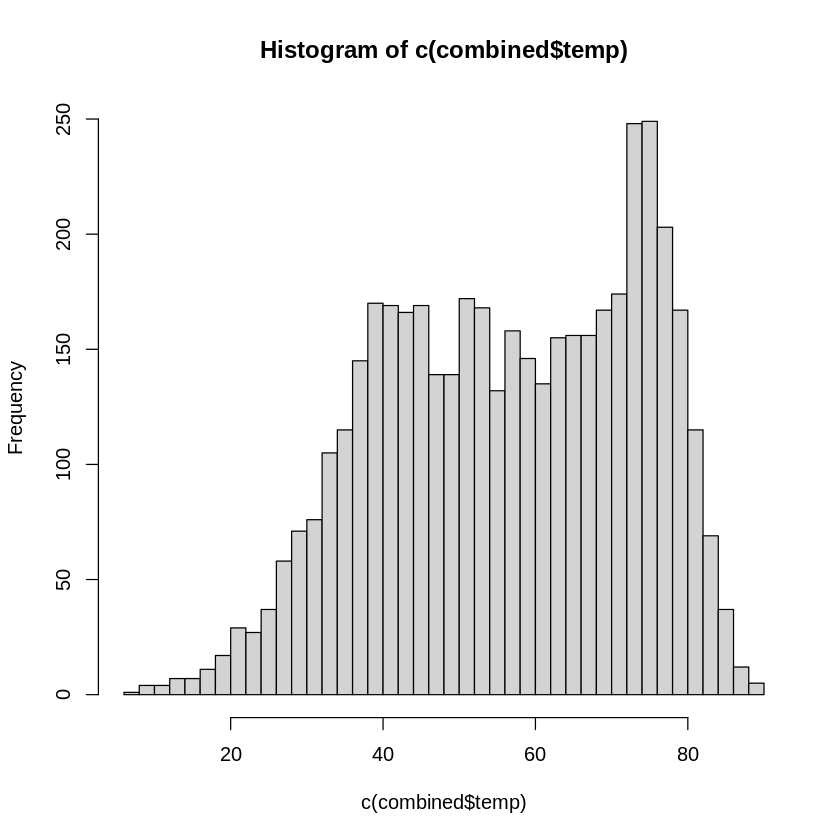

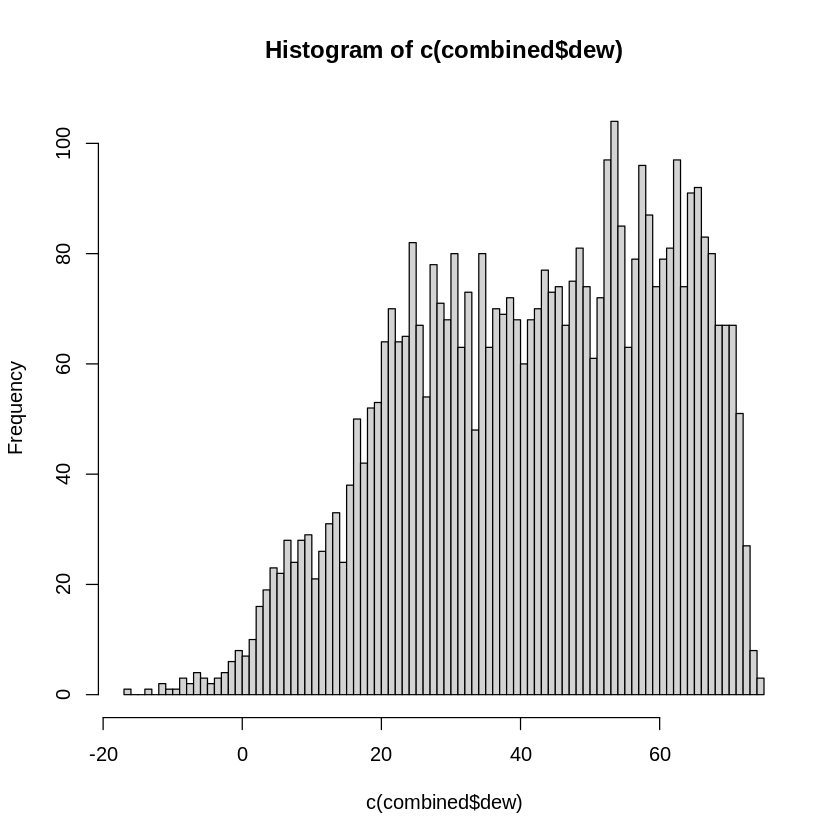

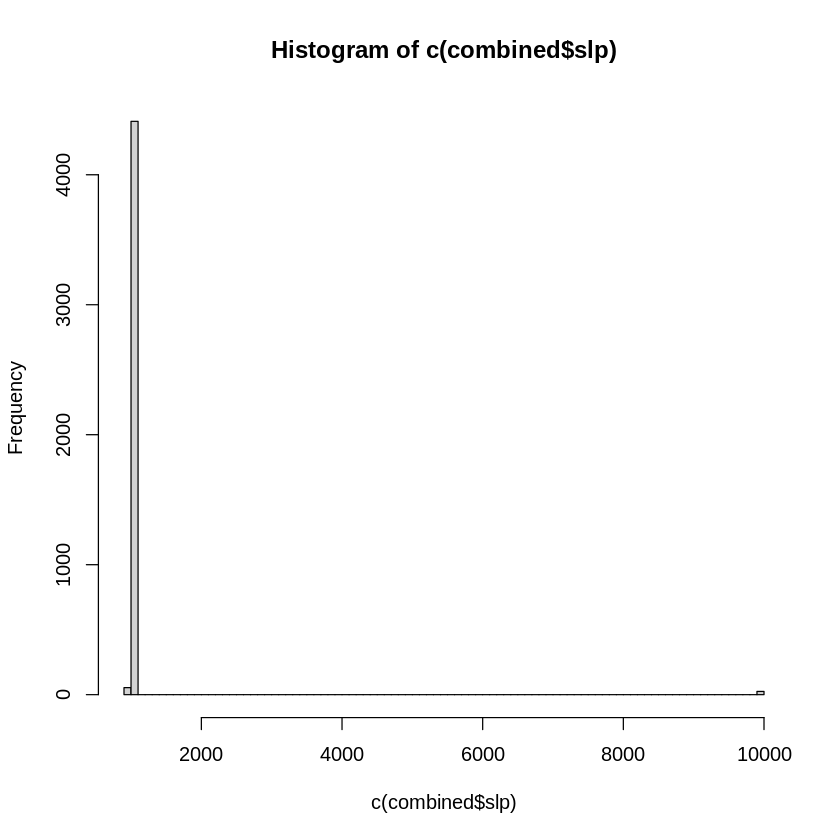

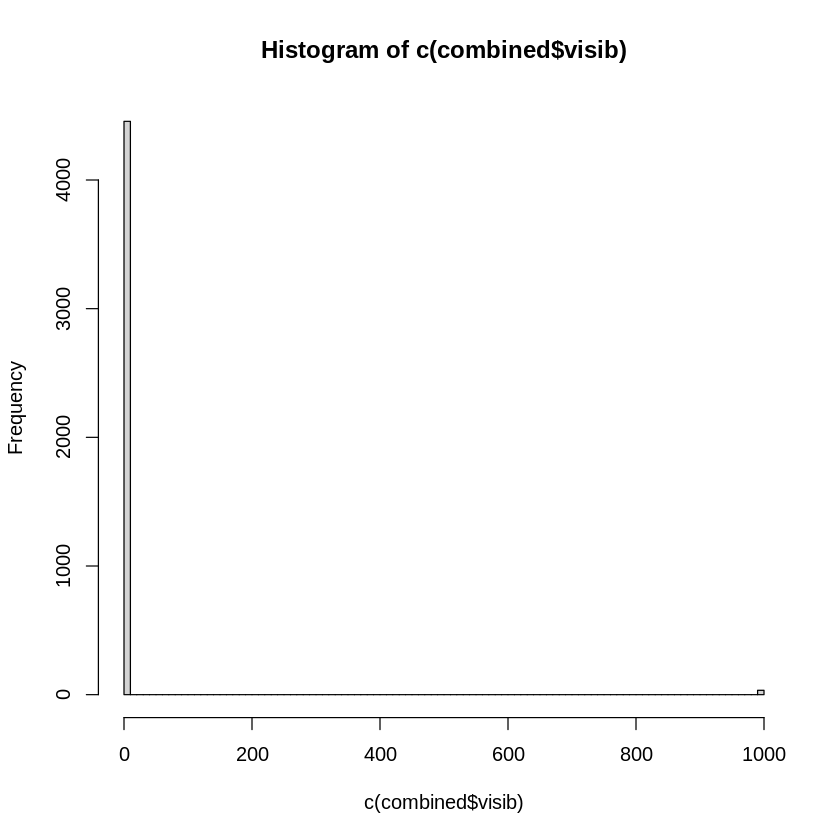

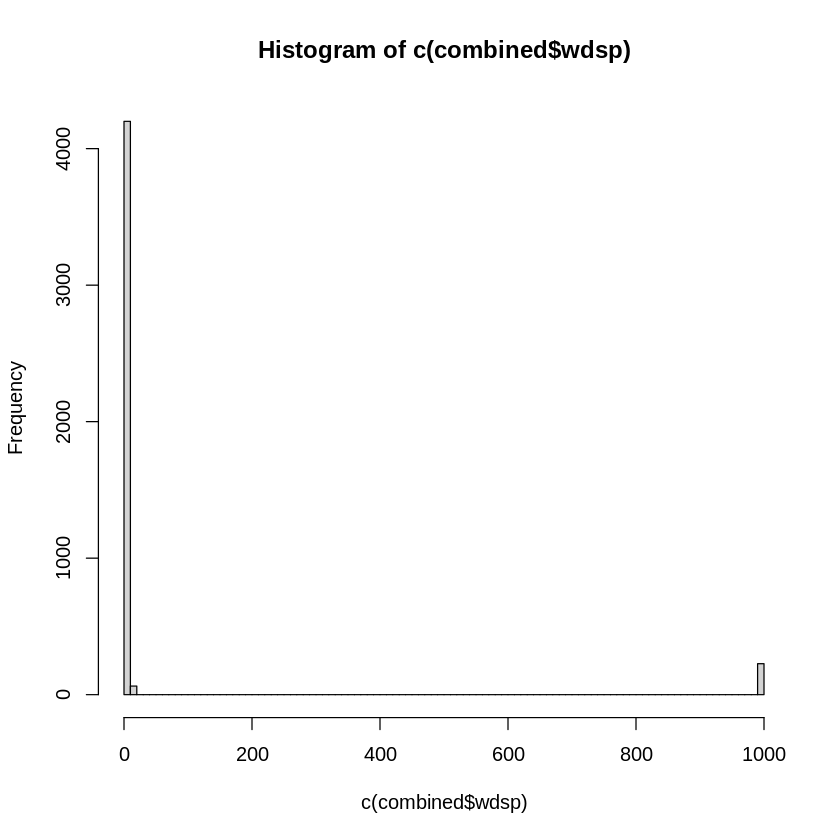

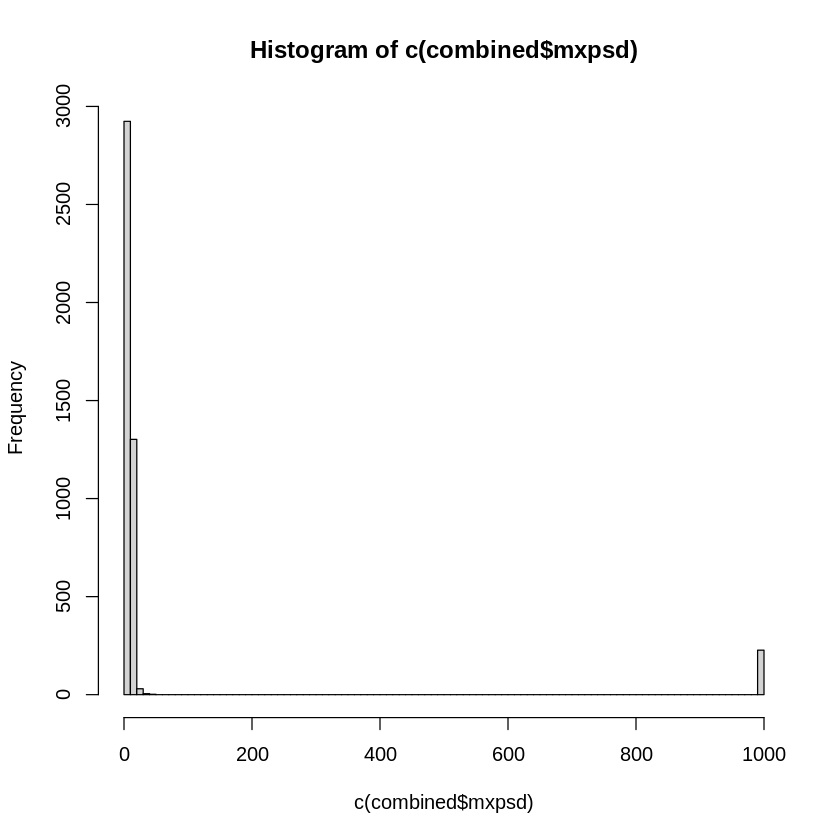

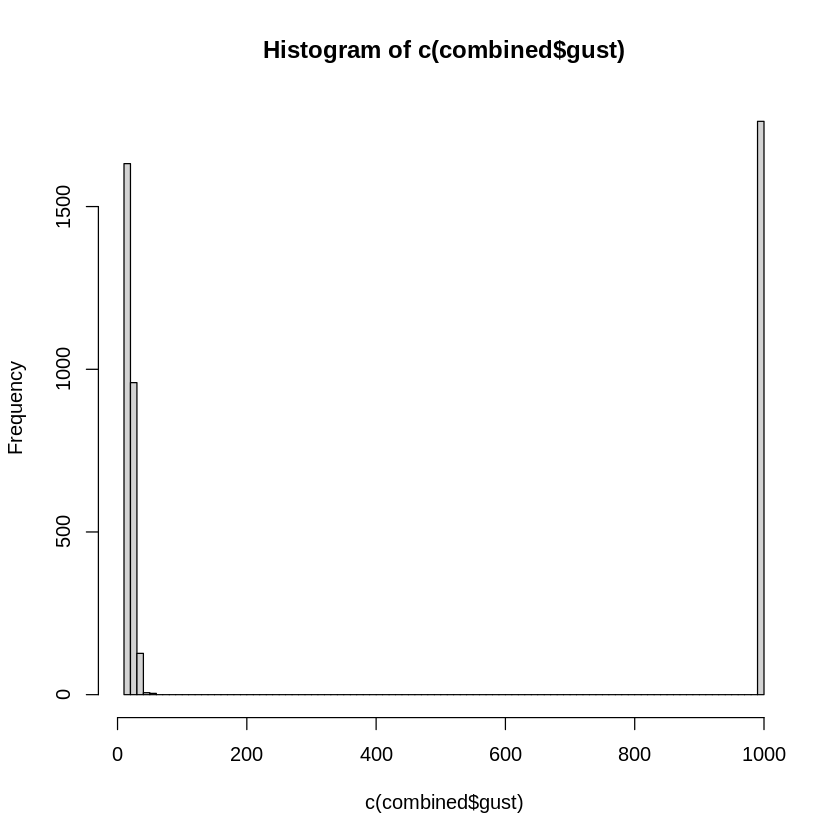

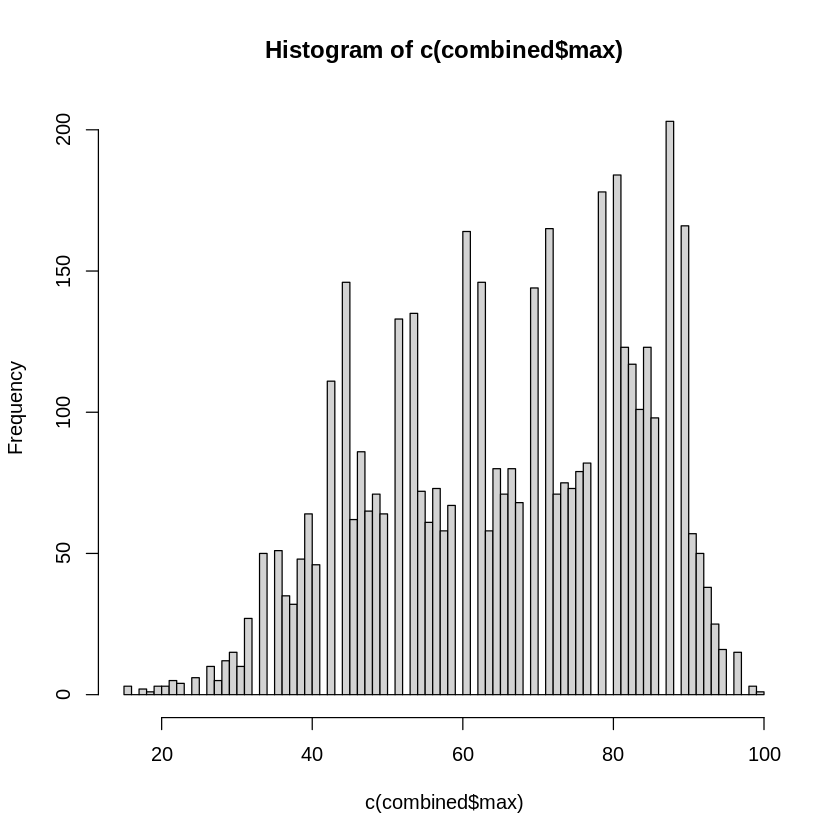

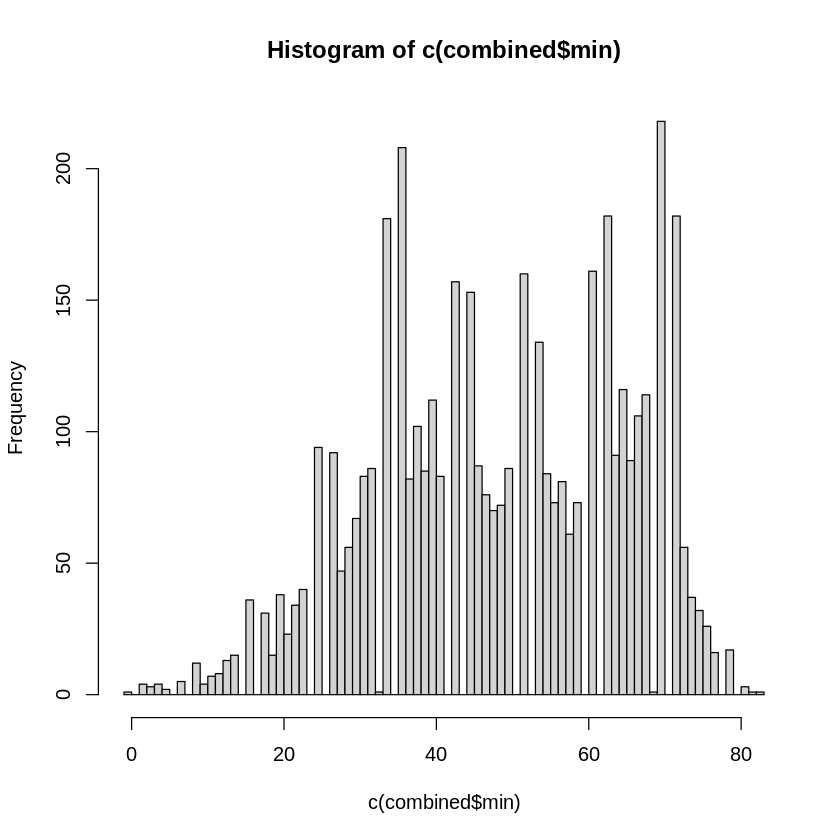

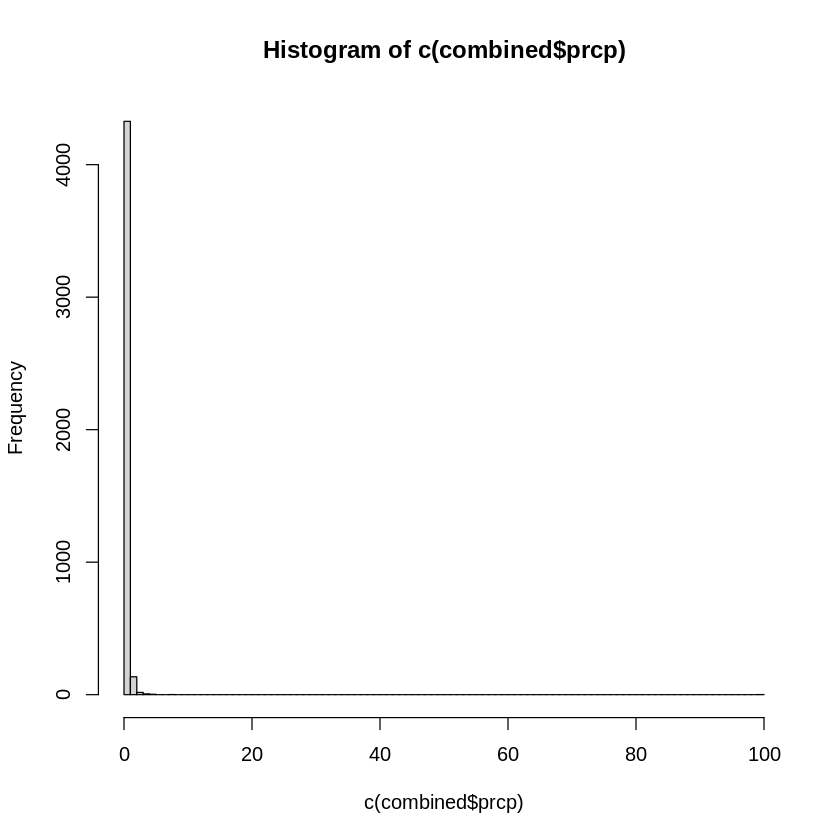

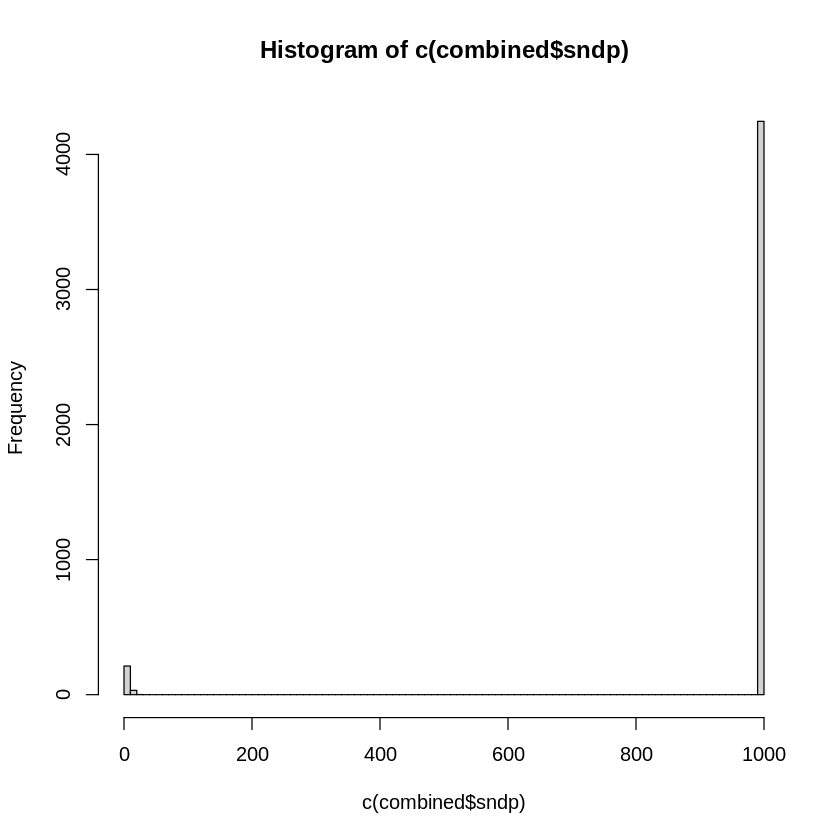

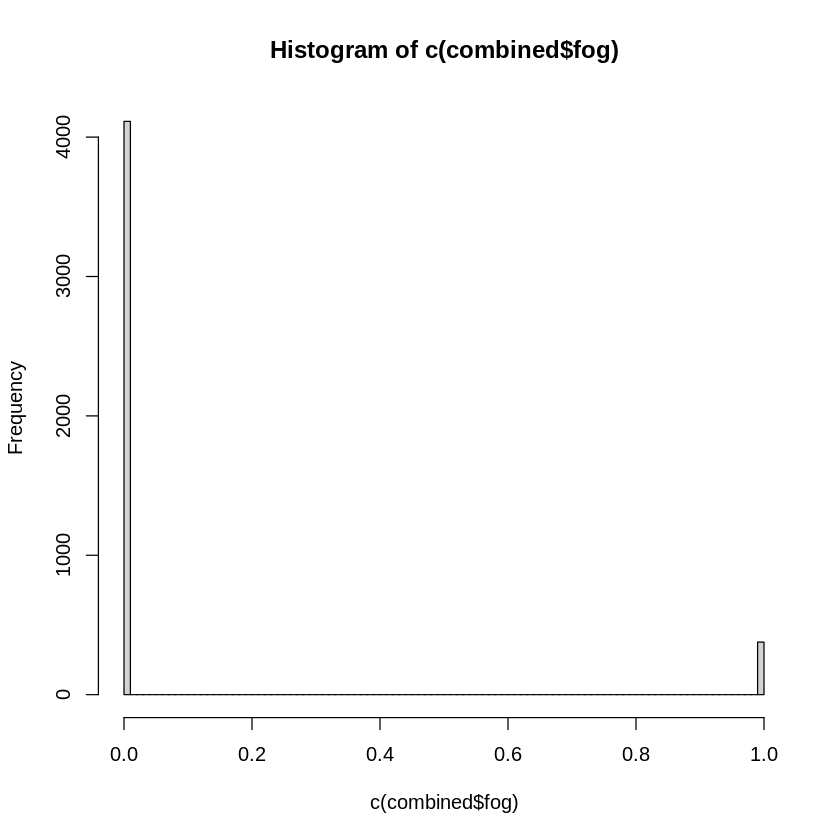

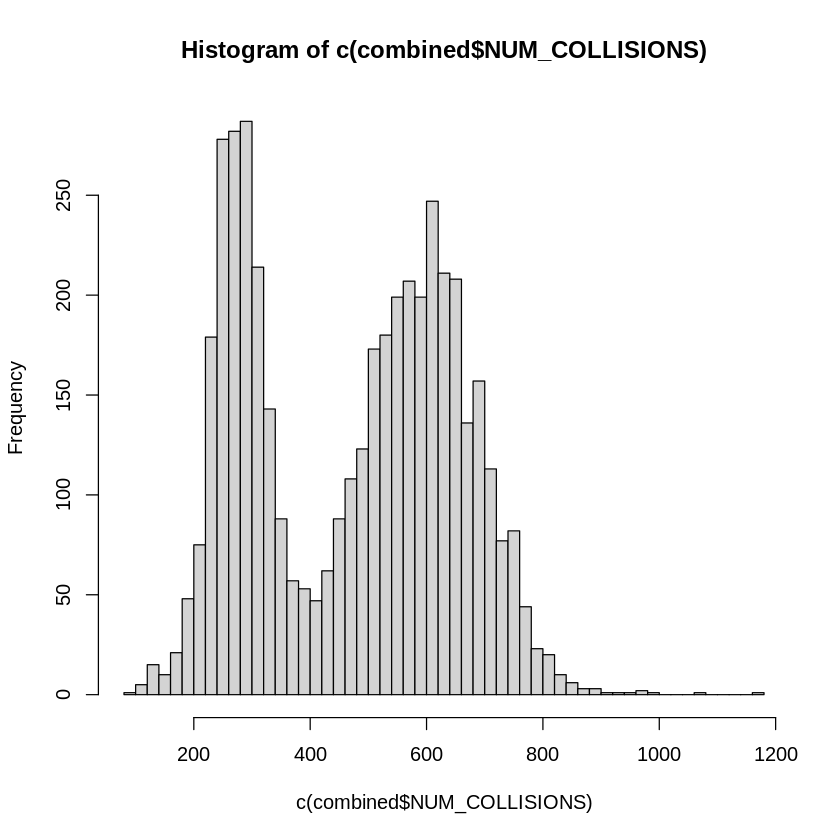

In [9]:
#histograms of attributes
hist(c(combined$temp), breaks = 50)
hist(c(combined$dew), breaks = 100)
hist(c(combined$slp), breaks = 100)
hist(c(combined$visib), breaks = 100)
hist(c(combined$wdsp), breaks = 100)
hist(c(combined$mxpsd), breaks = 100)
hist(c(combined$gust), breaks = 100)
hist(c(combined$max), breaks = 100)
hist(c(combined$min), breaks = 100)
hist(c(combined$prcp), breaks = 100)
hist(c(combined$sndp), breaks = 100)
hist(c(combined$fog), breaks = 100)
hist(c(combined$NUM_COLLISIONS), breaks = 50)

The histograms further highlight that the values of 99.9/999.9/9999.9 are in place of missing values. Data rows where the values are 999.9 for Visibility, Wind Speed, Maximum Sustained Wind and Wind Gust will be removed from the data. Values of 99.9/ 999.9 for Precipitation and Snow Depth will be set to 0 as no rain or snow was recorded.

In [10]:
#combined data cleaned completely
combined_clean <- combined %>%
  mutate(
  #replace with 0
    prcp = ifelse(prcp == 99.9, 0, prcp),
    sndp = ifelse(sndp == 999.9, 0, sndp)
  ) %>%
  filter(
  #remove missing values
    visib != 999.9,
    wdsp != 999.9,
    mxpsd != 999.9,
    gust != 999.9,
    slp != 9999.9
  )

In [11]:
#provde summary of cleaned data
summary(combined_clean)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2015   1st Qu.: 3.000   1st Qu.: 8.00  
 Median :4.000   Median :2018   Median : 6.000   Median :16.00  
 Mean   :4.022   Mean   :2018   Mean   : 6.145   Mean   :15.92  
 3rd Qu.:6.000   3rd Qu.:2021   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2024   Max.   :12.000   Max.   :31.00  
 collision_date            temp            dewp             slp      
 Min.   :2012-07-01   Min.   : 6.90   Min.   :-16.10   Min.   : 989  
 1st Qu.:2015-03-09   1st Qu.:40.00   1st Qu.: 23.70   1st Qu.:1011  
 Median :2018-02-02   Median :51.90   Median : 37.20   Median :1016  
 Mean   :2018-06-12   Mean   :52.83   Mean   : 37.97   Mean   :1016  
 3rd Qu.:2021-10-16   3rd Qu.:66.35   3rd Qu.: 53.40   3rd Qu.:1021  
 Max.   :2024-10-15   Max.   :89.10   Max.   : 74.80   Max.   :1041  
     visib             wdsp            mxpsd           

The summary of the cleaned dataset confirms all missing values have been removed or replaced with 0. The histograms have been reproduced for the cleaned data below.

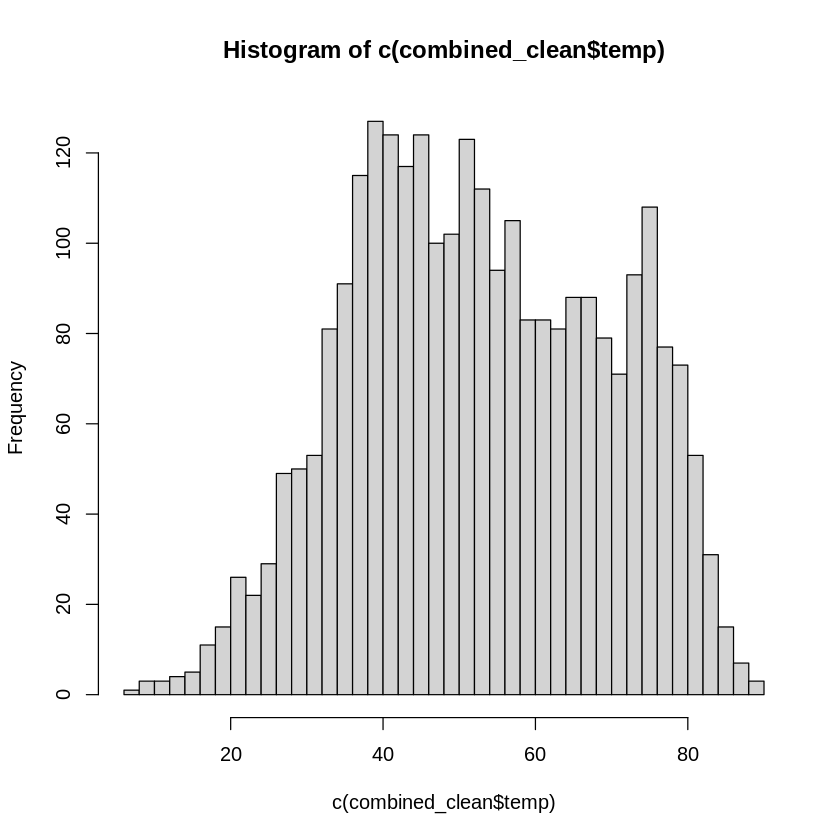

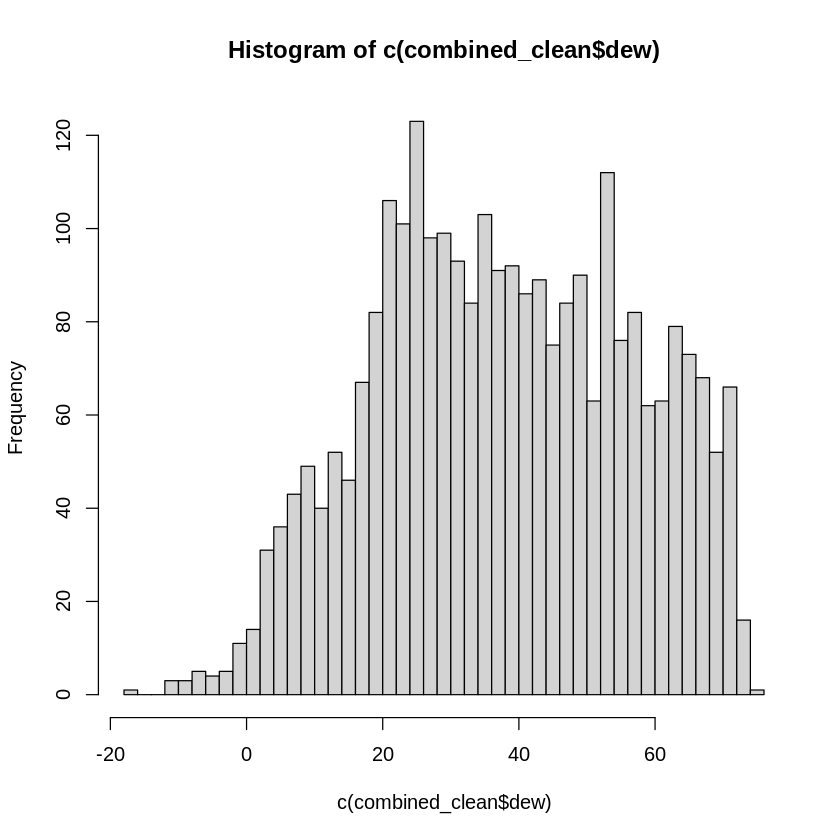

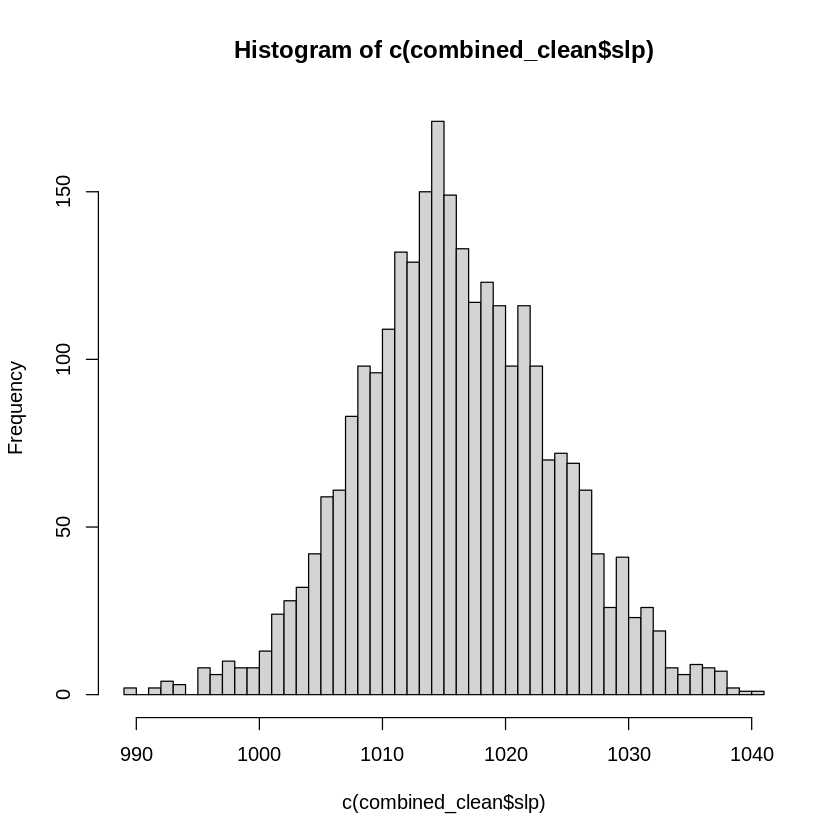

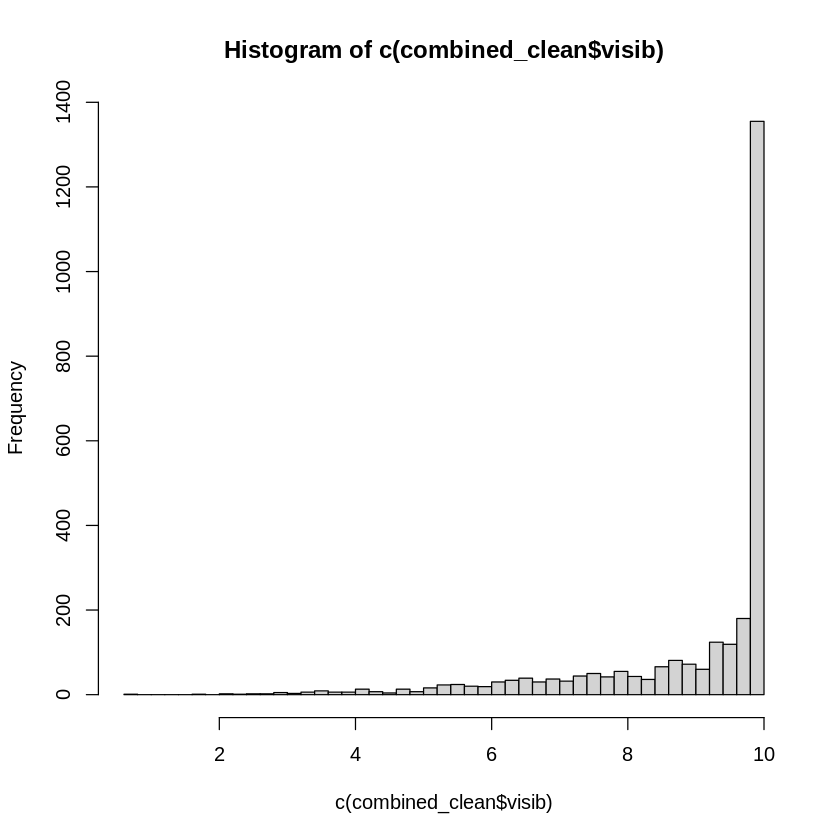

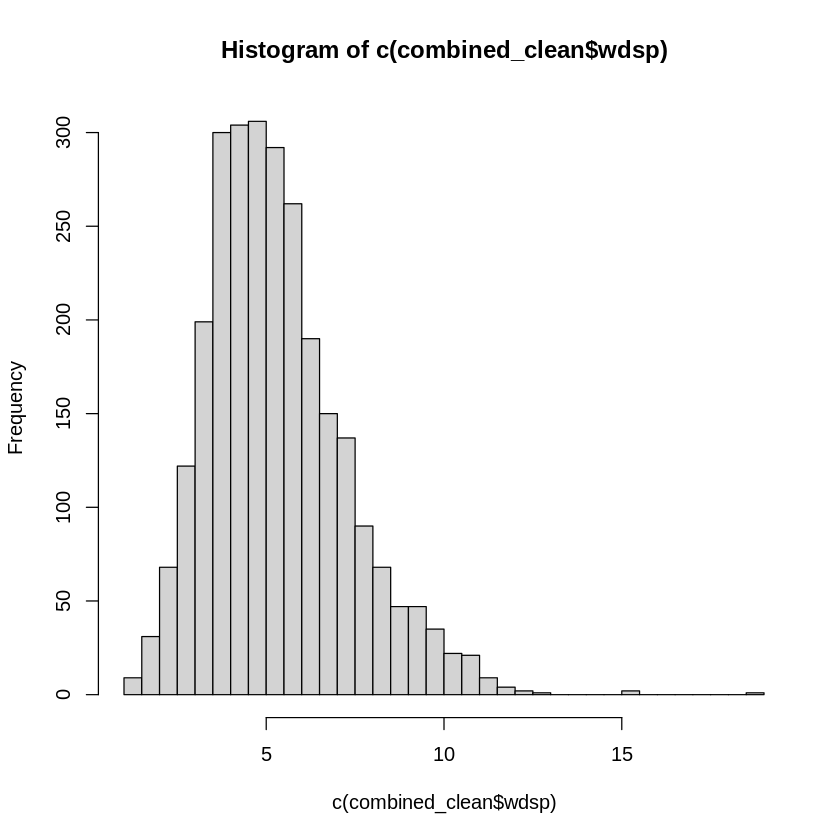

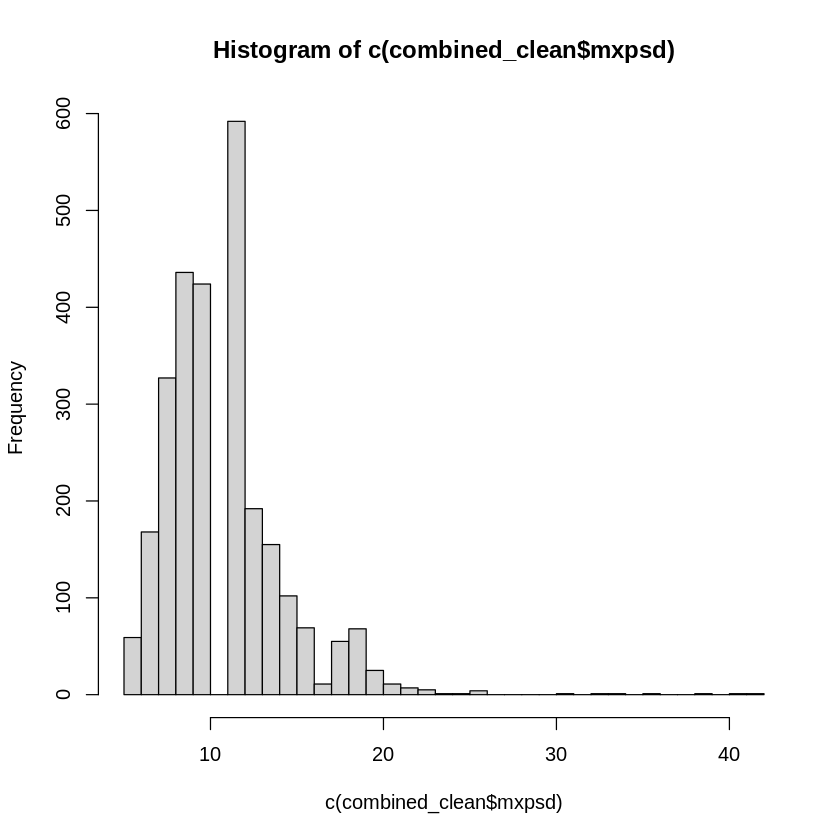

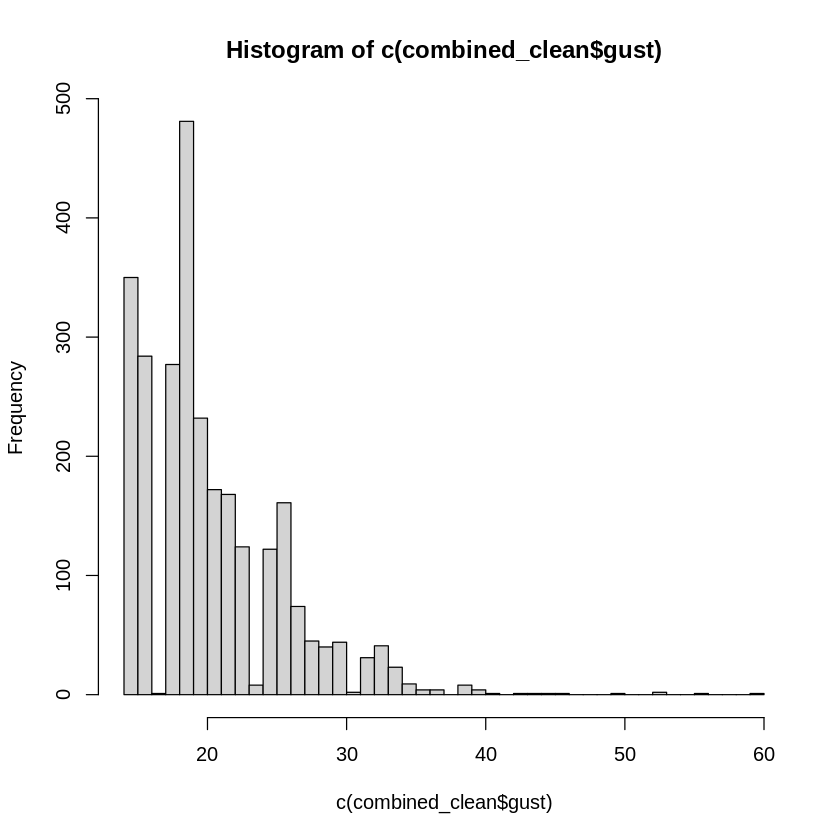

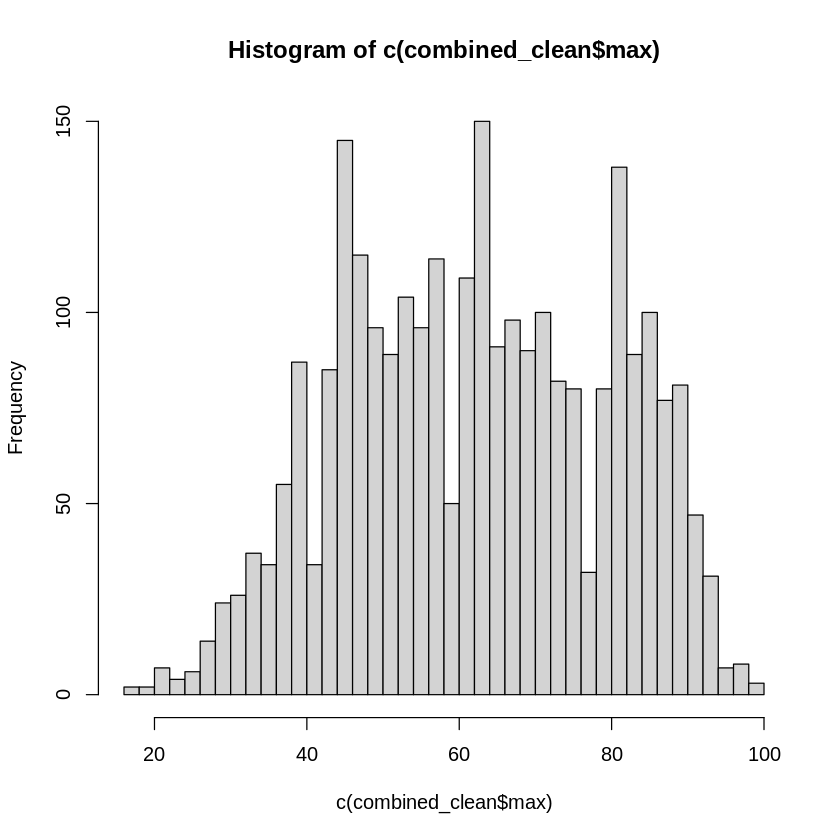

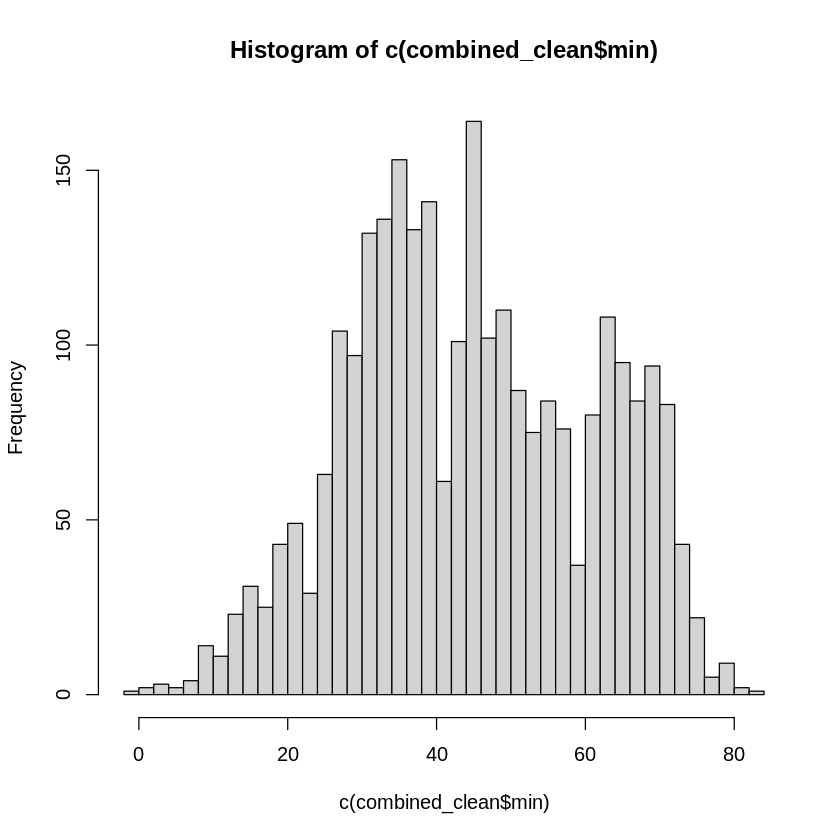

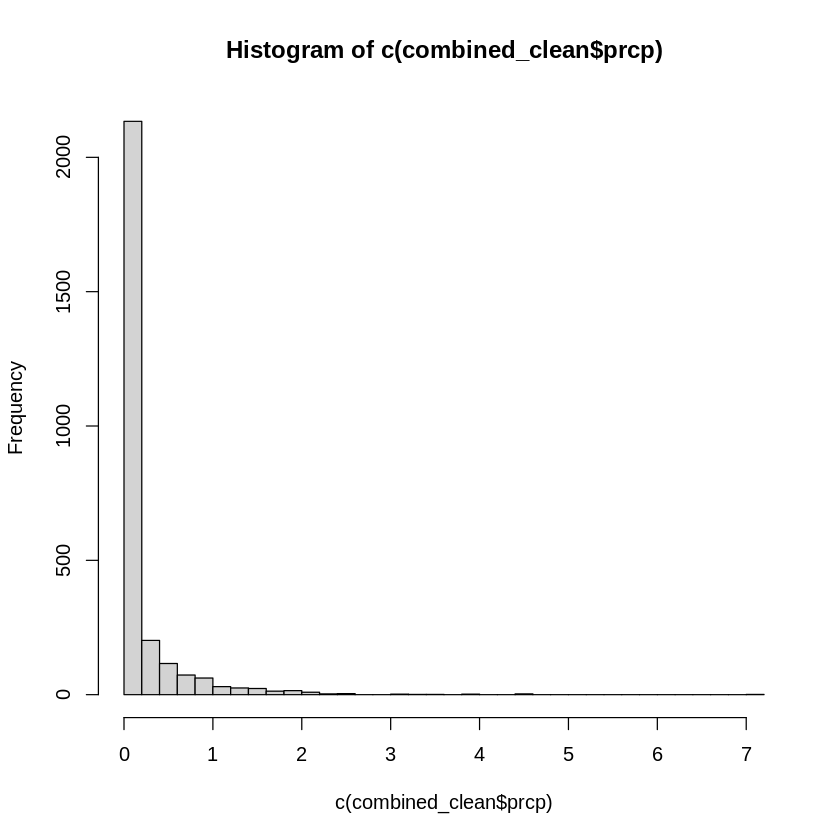

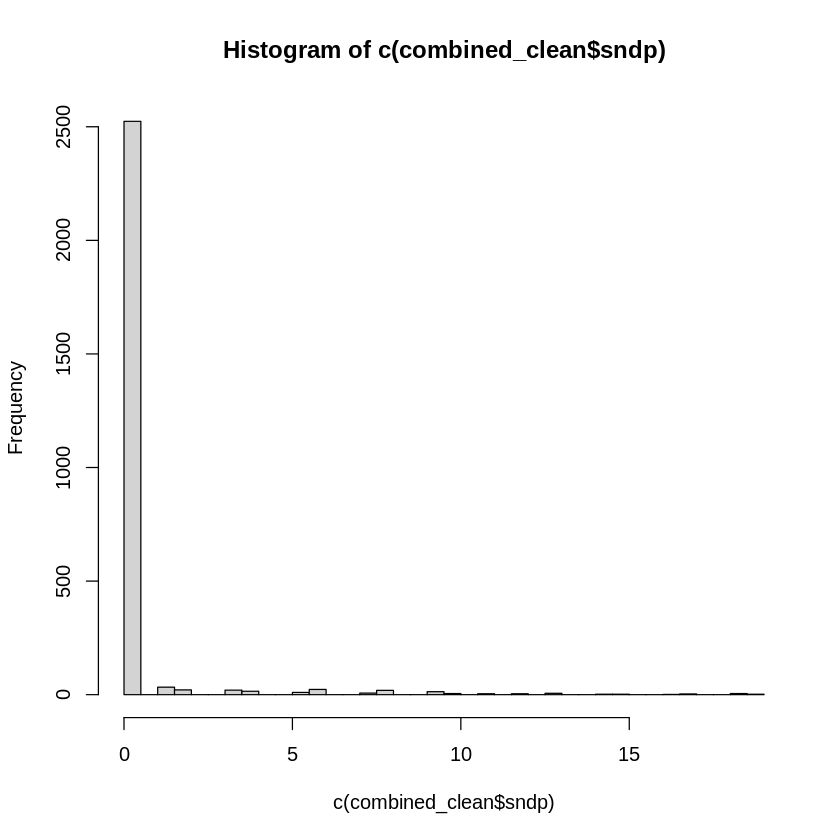

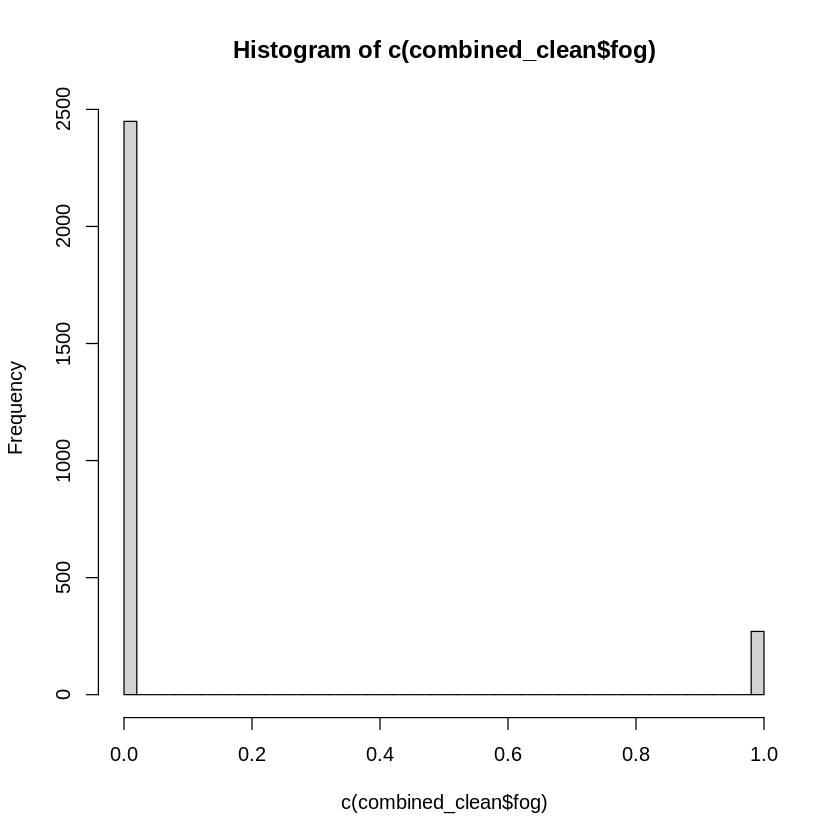

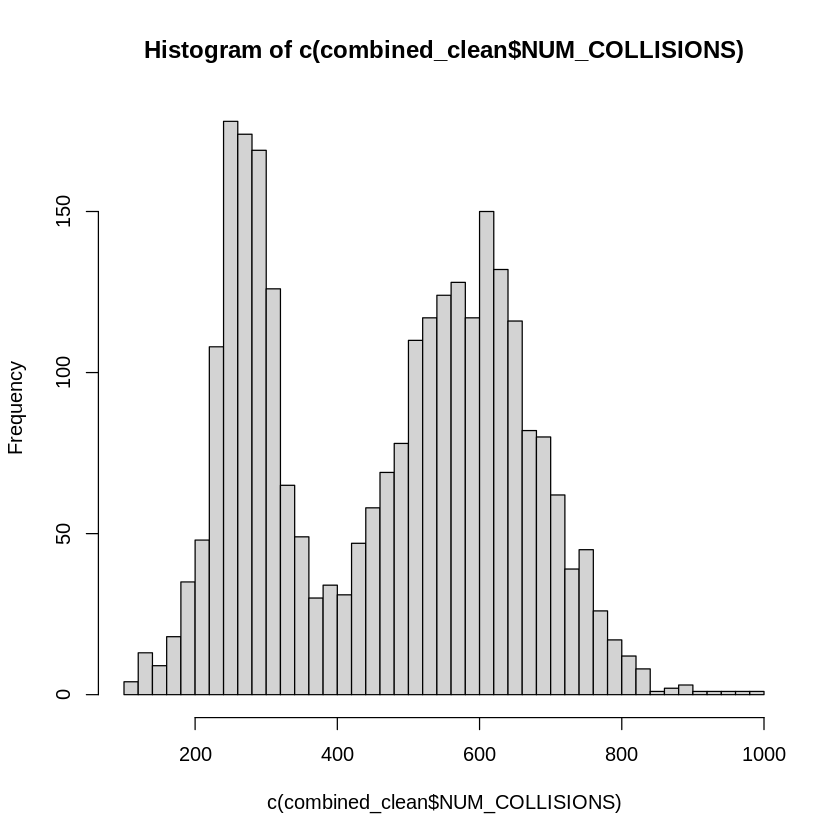

In [12]:
#histograms of attributes
hist(c(combined_clean$temp), breaks = 50)
hist(c(combined_clean$dew), breaks = 50)
hist(c(combined_clean$slp), breaks = 50)
hist(c(combined_clean$visib), breaks = 50)
hist(c(combined_clean$wdsp), breaks = 50)
hist(c(combined_clean$mxpsd), breaks = 50)
hist(c(combined_clean$gust), breaks = 50)
hist(c(combined_clean$max), breaks = 50)
hist(c(combined_clean$min), breaks = 50)
hist(c(combined_clean$prcp), breaks = 50)
hist(c(combined_clean$sndp), breaks = 50)
hist(c(combined_clean$fog), breaks = 50)
hist(c(combined_clean$NUM_COLLISIONS), breaks = 50)

The histograms show a normal distribution for Temperature (temp), Dew (dew), Sea Level Pressure (slp) and Maximum (max) and Minimum (min) wind speed. The data for Mean Wind Speed (wdsp), Maximum Sustained Wind Speed (mxpsd), Maximum Wind Gust (gust) and Precipitation (prcp), Snow Depth (sndp) all show skewed data, likely due to lower frequency of higher values for these variables. For example, snow typically only falls during the winter months and therefore for 3 seasons of the year it is most likely that there is 0 inches of snow, hence a large frequency of no snow recorded. It is likely that extremely high gusts are only recorded in storms or abnormal conditions and therefore also have low frequency. Smilarly, for Precipitation, 0inches is the most common result recorded with significantly more data.
The histograms also confirm that Fog (fog) is a binary value where Fog is or is not recorded.

### Data Analysis
Having computed a more coherent dataset, analysis of the weather variables against the number of collisions can be conducted.

##### Temperature

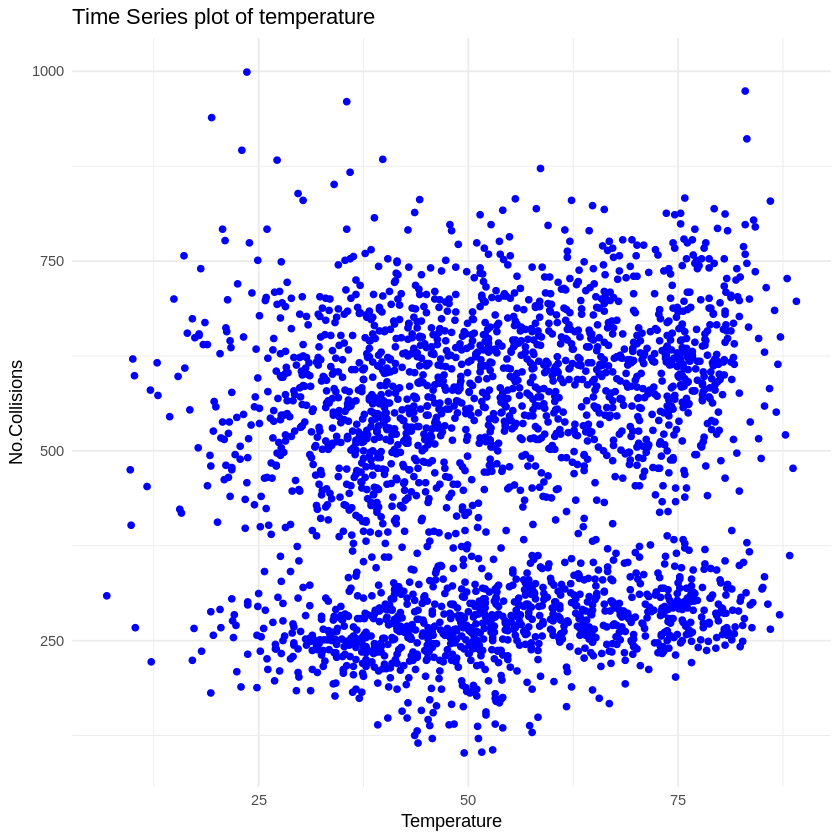

In [13]:
#simple plots to review data
#temperature plot
ggplot(combined_clean, aes(x = temp , y = NUM_COLLISIONS)) +
  geom_point(colour = "blue")+
  labs(title = "Time Series plot of temperature",
x = "Temperature", y = "No.Collisions")+
  theme_minimal()

Plotting temperature shows two distinct clusters of data across the whole temperature range. Both clusters are trending in the same direction, with a slight increase in the number of collisions as the temperature rises. The correlation coefficient is calculated below, determining a very weak positive correlation with a value of only 0.09. Further, the frequency of data across the temperature range is relatively consistent, dropping at the extremes, as seen in the histogram.  

In [14]:
#compute correlation coefficient of temperature
temp_cor <- cor(combined_clean$temp, combined_clean$NUM_COLLISIONS)

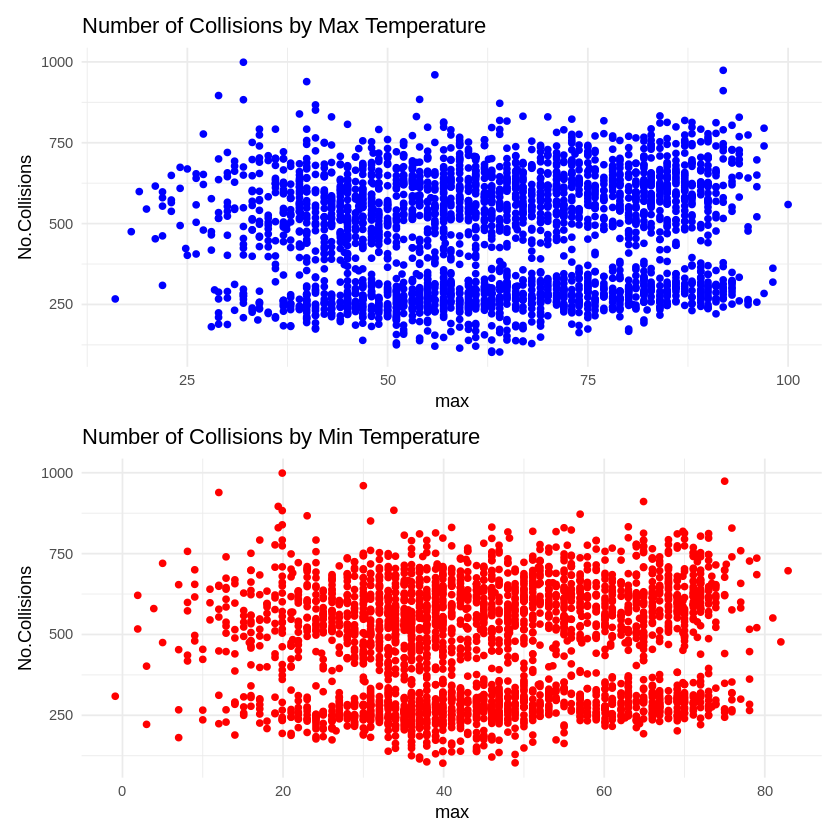

In [15]:
#plot maximum temperature
p1 <- ggplot(combined_clean, aes(x = max, y = NUM_COLLISIONS)) +
  geom_point(colour = "blue")+
  labs(title = "Number of Collisions by Max Temperature ",
x = "max", y = "No.Collisions")+
  theme_minimal()

#plot maximum temperature
p2 <- ggplot(combined_clean, aes(x = min, y = NUM_COLLISIONS)) +
  geom_point(colour = "red")+
  labs(title = "Number of Collisions by Min Temperature ",
x = "max", y = "No.Collisions")+
  theme_minimal()

#present both plots together
p1/p2

In [16]:
#compute correlation coefficient of max temperature
max_cor <-cor(combined_clean$max, combined_clean$NUM_COLLISIONS)

#compute correlation coefficient of min temperature
min_cor <-cor(combined_clean$min, combined_clean$NUM_COLLISIONS)

In [17]:
#table of all temperature correlation coeffficients
cor_data_temp <- data.frame(
  variable = c("Temperature", "Max Temperature", "Min Temperature"),
  Coefficient = c(temp_cor, max_cor, min_cor)
)

knitr::kable(cor_data_temp )



|variable        | Coefficient|
|:---------------|-----------:|
|Temperature     |   0.0853085|
|Max Temperature |   0.0793632|
|Min Temperature |   0.0812676|

Reviewing the data for maximum and minimum temperature, the findings above are reconfirmed with both plots showing similar patterns. The correlation coefficients for maximum and minimum temperature are both consistent with mean temperature, all presented in the table above, showing very weak positive correlations.
Further, the scatter matrix below shows a strong linear relationship between temperature, maximum temperature and minimum temperature confirming their relationship, aligning with the findings above.

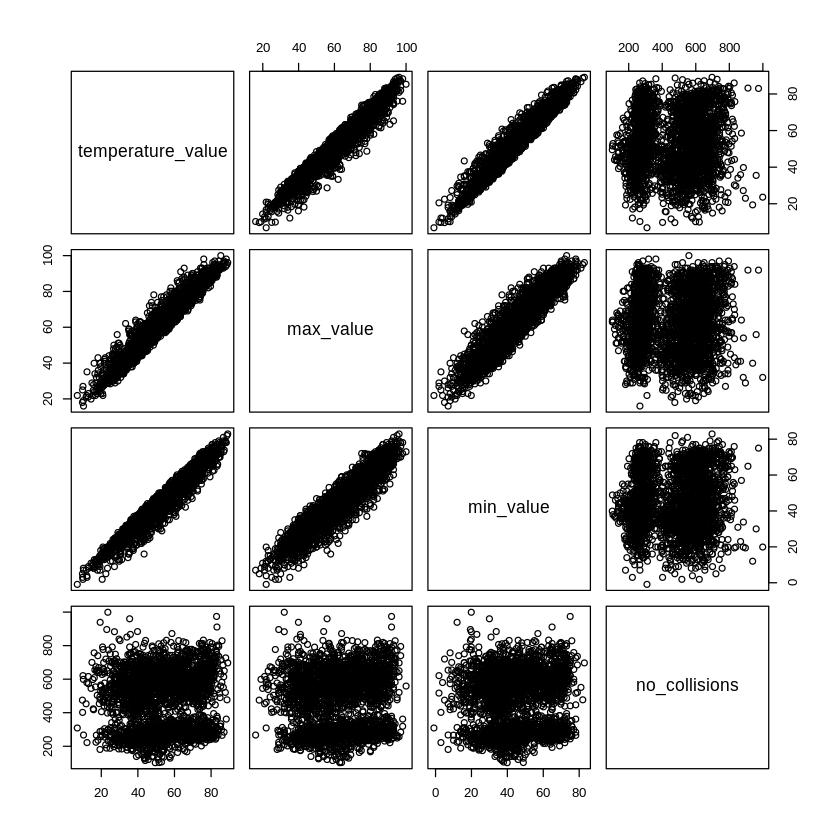

In [18]:
#matrix plot of all temperature variables
scattermatrix = data.frame(temperature_value = combined_clean$temp,  max_value = combined_clean$max, min_value = combined_clean$min, no_collisions = combined_clean$NUM_COLLISIONS)
pairs(scattermatrix[,1:4])

##### Dew Point

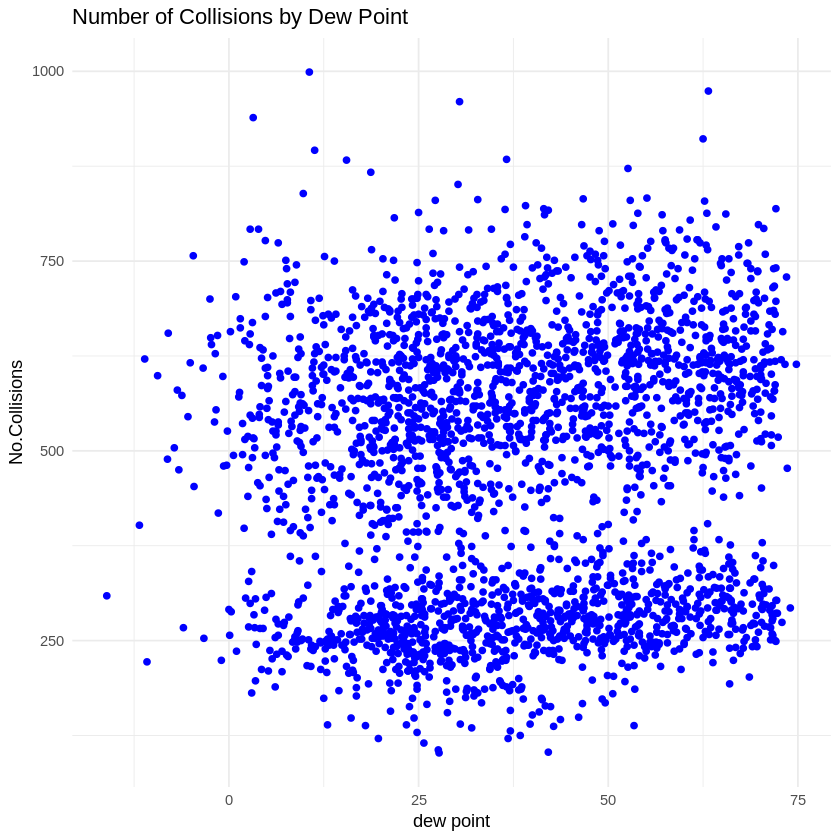

In [19]:
#dew point
ggplot(combined_clean, aes(x = dewp, y = NUM_COLLISIONS)) +
  geom_point(color = "blue")+
  labs(title = "Number of Collisions by Dew Point",
x = "dew point", y = "No.Collisions")+
  theme_minimal()

Assessing the number of collisions by dew point further suggests no linear relationship between the dew point and the number of collisions that occured. However, computing the correlation coefficient below, a very weak positive correlation of 0.085 is confirmed, thus similar to Temperature. Further, the clusters of data are consistent with the temperature data.

In [20]:
#compute correlation coefficient of temperature
cor(combined_clean$dewp, combined_clean$NUM_COLLISIONS)

[1] 0.08471006

##### Sea Level Pressure

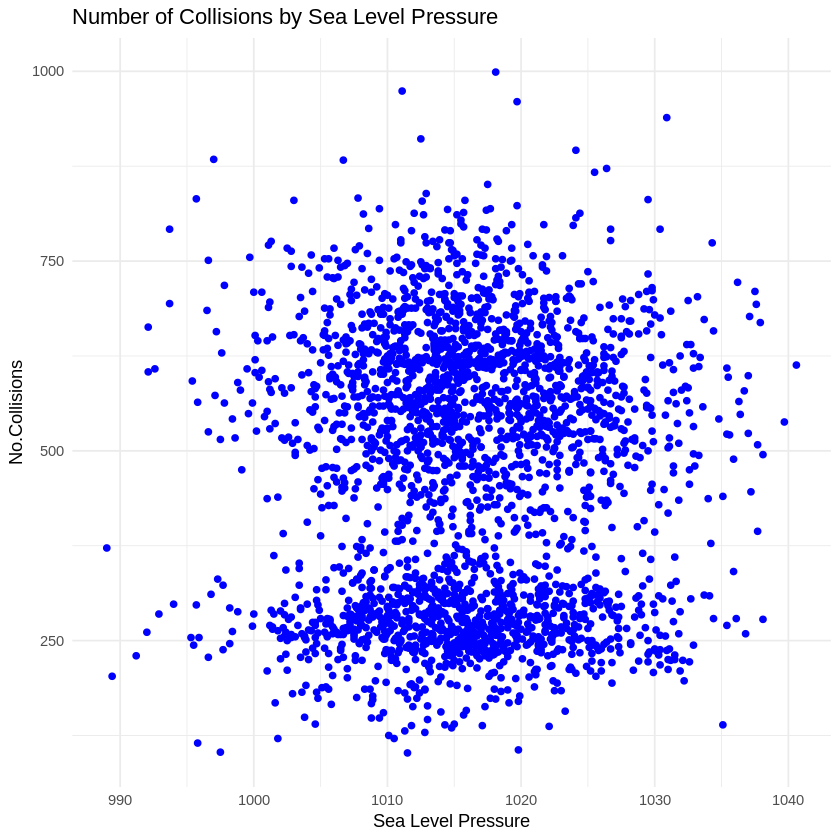

In [21]:
#slp point
ggplot(combined_clean, aes(x = slp, y = NUM_COLLISIONS)) +
  geom_point(color = "blue")+
  labs(title = "Number of Collisions by Sea Level Pressure",
x = "Sea Level Pressure", y = "No.Collisions")+
  theme_minimal()

In [22]:
#compute correlation coefficient of temperature
cor(combined_clean$slp, combined_clean$NUM_COLLISIONS)

[1] 0.02620826

Sea Level Pressure also presents two clusters of data with a further outliers. It confirms that there is almost no linear relationship between the sea pressure and number of collisions with a correlation coefficient of 0.026.

##### Wind

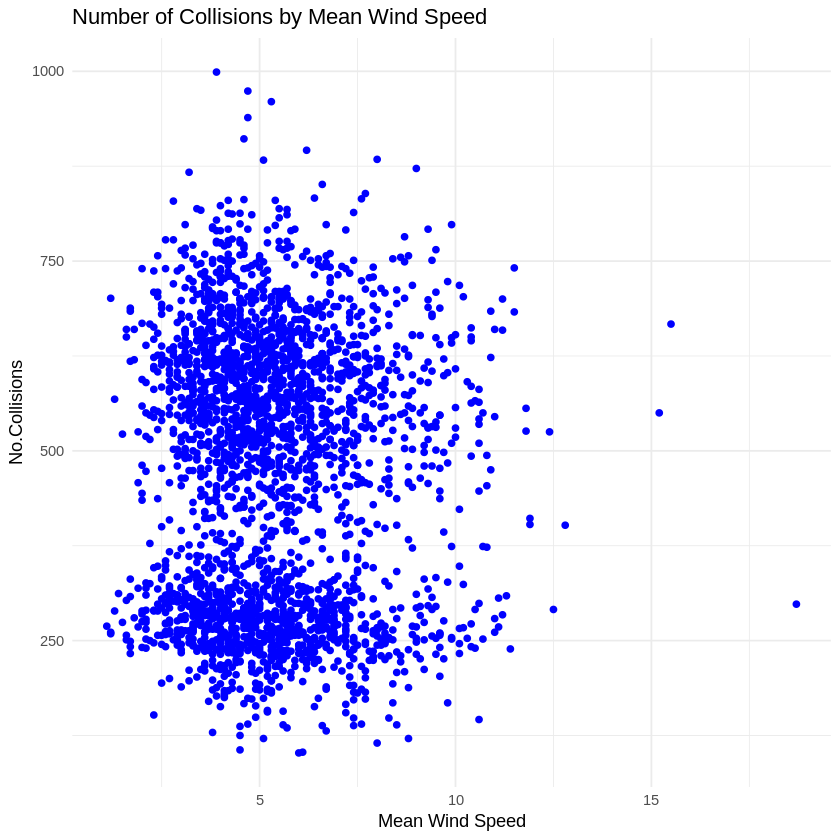

In [23]:
#wdsp point
ggplot(combined_clean, aes(x = wdsp, y = NUM_COLLISIONS)) +
  geom_point(color = "blue")+
  labs(title = "Number of Collisions by Mean Wind Speed",
x = "Mean Wind Speed", y = "No.Collisions")+
  theme_minimal()

In [24]:
#compute correlation coefficient of temperature
wind_cor <- cor(combined_clean$wdsp, combined_clean$NUM_COLLISIONS)

The mean wind speed shows almost no linear relationship with the number of collisions, with a negative correlation coefficient of -0.023 calculated. Wind gusts and sustained wind also displays a negative correlation, with correlation coefficients of -0.018 and -0.022 respectively.

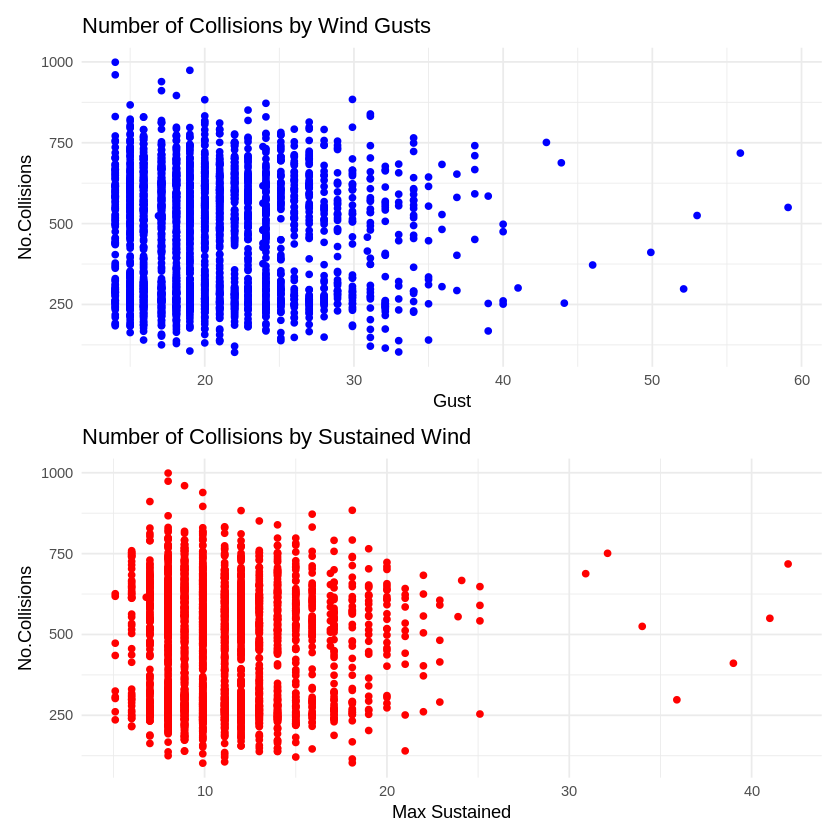

In [25]:
#gust point
p3 <- ggplot(combined_clean, aes(x = gust, y = NUM_COLLISIONS)) +
  geom_point(color = "blue")+
  labs(title = "Number of Collisions by Wind Gusts",
x = "Gust", y = "No.Collisions")+
  theme_minimal()

#mxpsd point
p4 <- ggplot(combined_clean, aes(x = mxpsd, y = NUM_COLLISIONS)) +
  geom_point(color = "red")+
  labs(title = "Number of Collisions by Sustained Wind",
x = "Max Sustained", y = "No.Collisions")+
  theme_minimal()

p3/p4

In [26]:
gust_cor <- cor(combined_clean$gust, combined_clean$NUM_COLLISIONS)
mxpsd_cor <- cor(combined_clean$mxpsd, combined_clean$NUM_COLLISIONS)

In [27]:
#table of all temperature correlation coeffficients
cor_data_wind <- data.frame(
  variable = c("Mean Wind", "Max Sustained Wind", "Max Wind Gust"),
  Coefficient = c(wind_cor, gust_cor, mxpsd_cor)
)

knitr::kable(cor_data_wind)



|variable           | Coefficient|
|:------------------|-----------:|
|Mean Wind          |  -0.0234607|
|Max Sustained Wind |  -0.0215674|
|Max Wind Gust      |  -0.0176400|

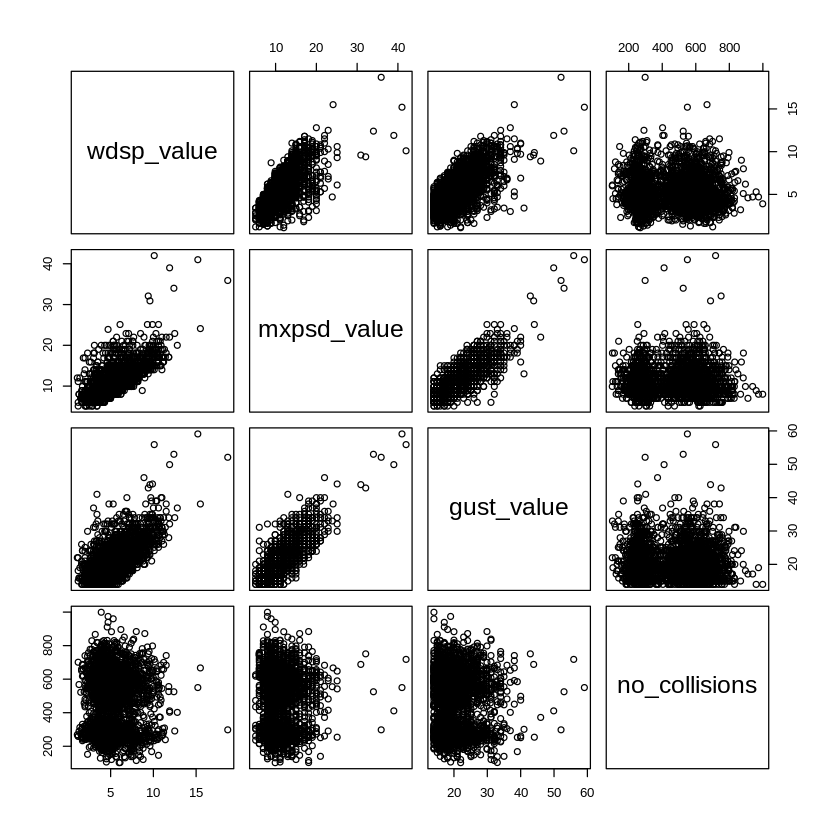

In [28]:
scattermatrix = data.frame(wdsp_value = combined_clean$wdsp,  mxpsd_value = combined_clean$mxpsd, gust_value = combined_clean$gust, no_collisions = combined_clean$NUM_COLLISIONS)
pairs(scattermatrix[,1:4])

The scattermatrix confirms the relationship between mean wind, gusts and maximum sustained wind, with a postive linear relationship.

##### Precipitation

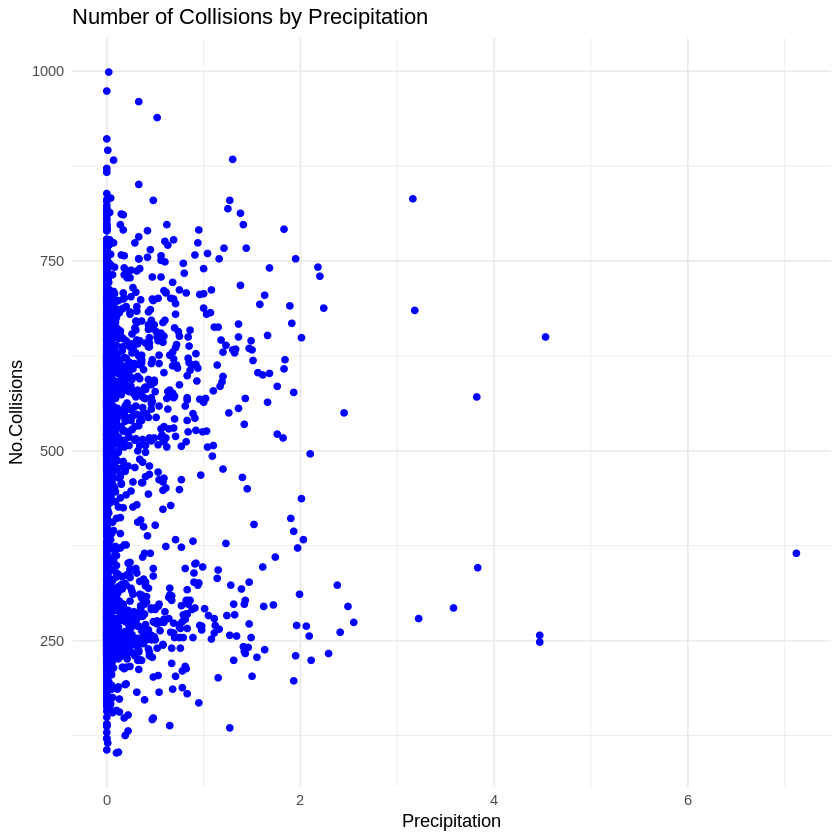

In [29]:
#precipitation
ggplot(combined_clean, aes(x = prcp, y = NUM_COLLISIONS)) +
  geom_point(color = "blue")+
  labs(title = "Number of Collisions by Precipitation",
x = "Precipitation", y = "No.Collisions")+
  theme_minimal()

In [30]:
cor(combined_clean$prcp, combined_clean$NUM_COLLISIONS)

[1] 0.002926513

Precipitation, above, confirms no linear relationship with the number of collisions, computing a correlation coefficient of 0.003.

##### Snow

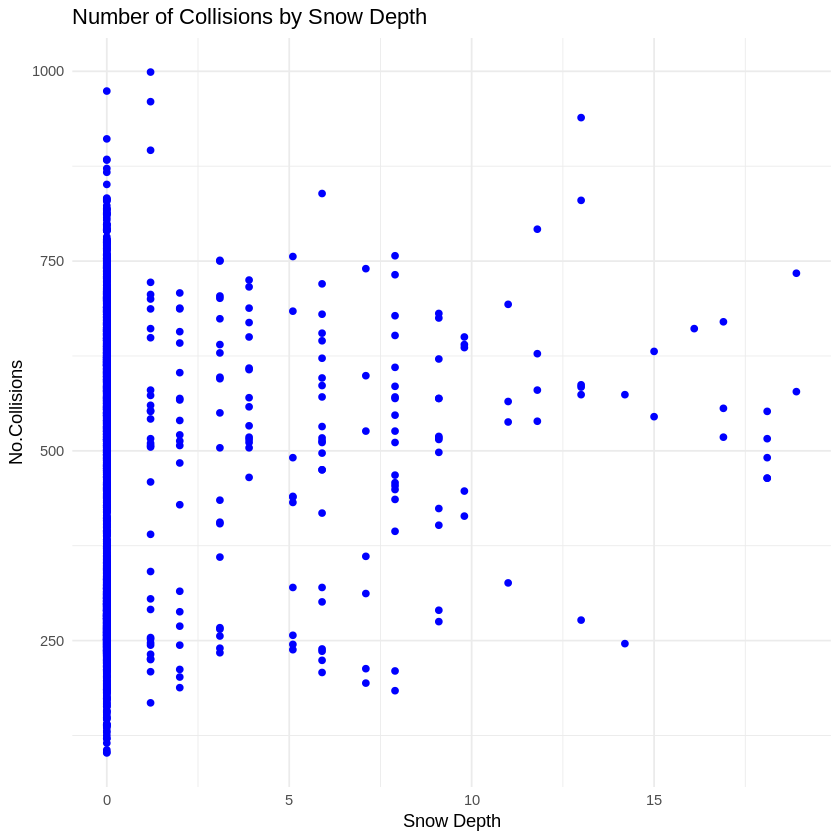

In [31]:
#snow
ggplot(combined_clean, aes(x = sndp, y = NUM_COLLISIONS)) +
  geom_point(color = "blue")+
  labs(title = "Number of Collisions by Snow Depth",
x = "Snow Depth", y = "No.Collisions")+
  theme_minimal()

In [32]:
cor(combined_clean$sndp, combined_clean$NUM_COLLISIONS)

[1] 0.0713279

Analysing the snow depth, a weak positive correlation can be confirmed, with a coefficient of 0.07.

##### Visibility

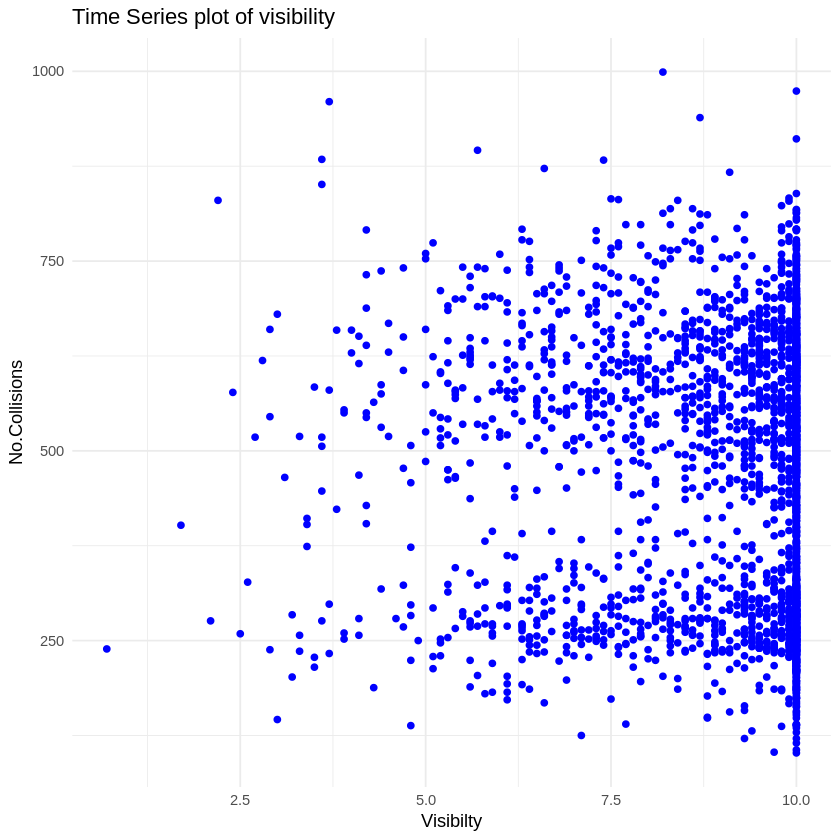

In [33]:
#visibility plot
ggplot(combined_clean, aes(x = visib, y = NUM_COLLISIONS)) +
  geom_point(colour = "blue")+
  labs(title = "Time Series plot of visibility",
x = "Visibilty", y = "No.Collisions")+
  theme_minimal()

In [34]:
cor(combined_clean$visib, combined_clean$NUM_COLLISIONS)

[1] -0.05679718

Assessing the visibility during collisions, there is a larger amount of data where the visibility is 10, good visibility, spanning the entire range of number of collisions. Calculating the correlation coefficient, a weak negative correlation can be confirmed with a value of -0.06.

##### Fog

As confirmed in the histogram, Fog is a binary variable where fog is recorded as a "yes" or "no". The plot below hightlights large variation in the number of collisions for both situations. Although there is no clear indication that Fog is a sole contributing factor to collisions, the inclusion of this in regression analysis will be useful to learn of the degree to which fog does have an impact alongside other weather variables such a precipitation for example.

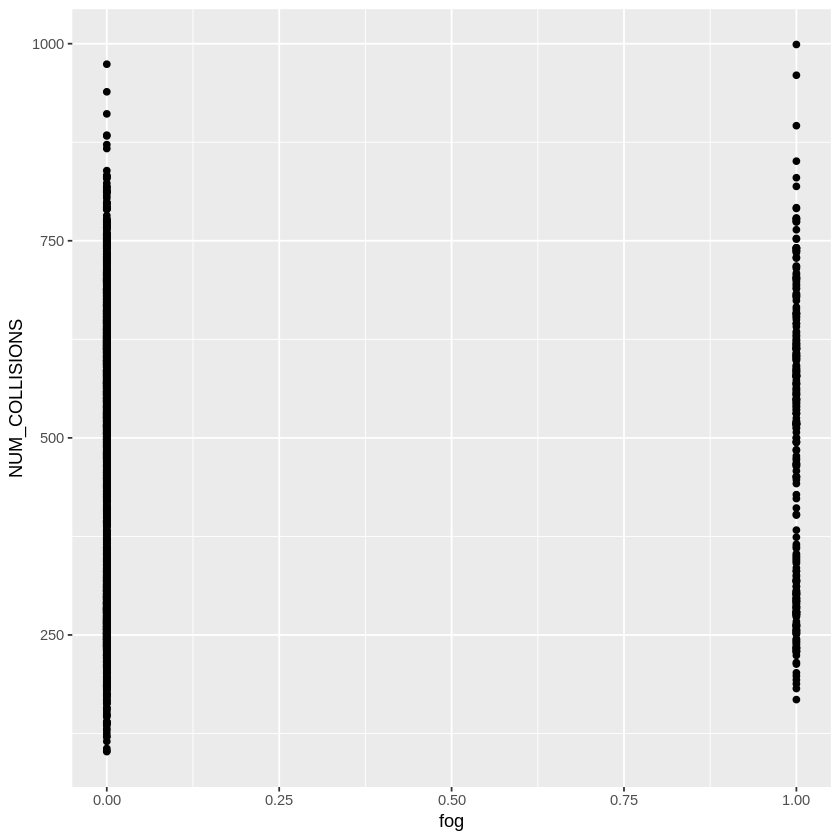

In [35]:
ggplot(combined_clean, aes(x = fog, y = NUM_COLLISIONS)) +
  geom_point()

##### Weather Summary

After reviewing all weather variables, it can be confirmed that certain weather has a greater impact on the number of collisions. Despite this, all variables will be considered when building the regression models.

The scattermatrix below shows the relationship between the weather variables. This shows a linear relationship between temperature and dew point where the correlation matrix below confirms a correlation of 0.93. Additionally, a negative linear relationship is identified with Sea Level Pressure for both Temperature and Dew Point, however this is less strong with a correlation of only -0.25 and -0.31 respectively. All other variables show no obvious relationships which is further confirmed by the correlation matrix.

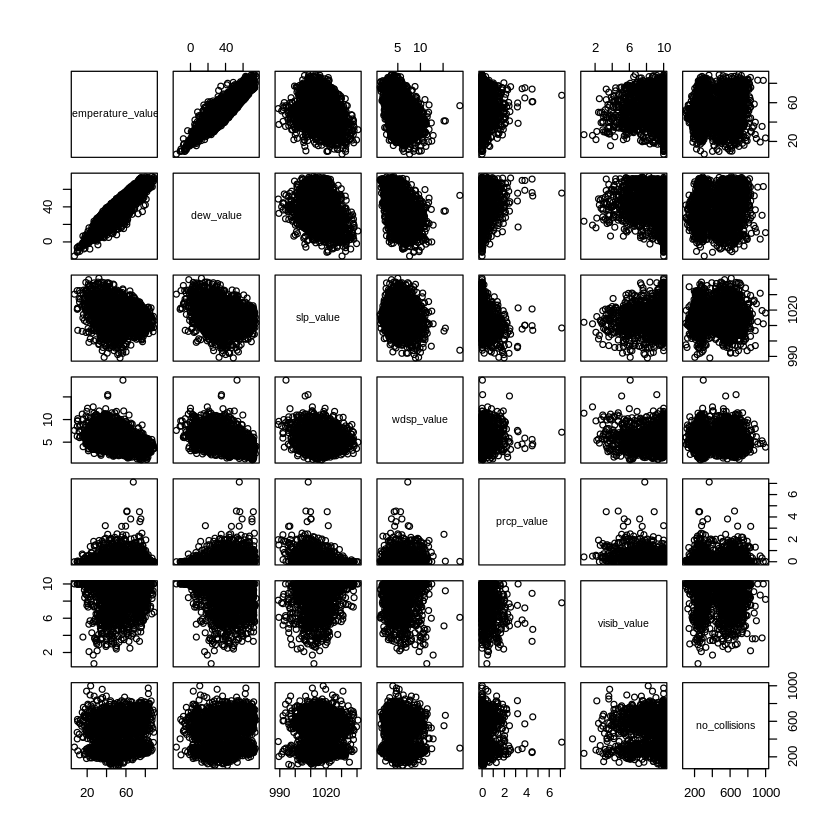

In [36]:
scattermatrix = data.frame(temperature_value = combined_clean$temp,  dew_value = combined_clean$dew, slp_value = combined_clean$slp, wdsp_value = combined_clean$wdsp, prcp_value = combined_clean$prcp, visib_value = combined_clean$visib, no_collisions = combined_clean$NUM_COLLISIONS)
pairs(scattermatrix[,1:7])

In [37]:
weather_cor <- data.frame(combined_clean$temp, combined_clean$max, combined_clean$min, combined_clean$dew, combined_clean$wdsp, combined_clean$gust, combined_clean$mxpsd, combined_clean$slp, combined_clean$prcp, combined_clean$sndp, combined_clean$NUM_COLLISIONS)
cor(weather_cor, weather_cor, use="complete.obs", method="pearson")

combined_clean.temp combined_clean.max
combined_clean.temp            1.00000000          0.97040065       
combined_clean.max             0.97040065          1.00000000       
combined_clean.min             0.97056556          0.93456873       
combined_clean.dew             0.92571860          0.87352647       
combined_clean.wdsp           -0.47849299         -0.45147155       
combined_clean.gust           -0.26603858         -0.24705113       
combined_clean.mxpsd          -0.30493053         -0.29123356       
combined_clean.slp            -0.24800951         -0.22095030       
combined_clean.prcp            0.05090544          0.03663670       
combined_clean.sndp           -0.28080511         -0.28224755       
combined_clean.NUM_COLLISIONS  0.08530849          0.07936321       
                              combined_clean.min combined_clean.dew
combined_clean.temp            0.97056556         0.92571860       
combined_clean.max             0.93456873         0.87352647       
combined_clean.min             1.00000000         0.92310903       
combined_clean.dew             0.92310903         1.00000000       
combined_clean.wdsp           -0.43157037        -0.44118060       
combined_clean.gust           -0.24886809        -0.21443210       
combined_clean.mxpsd          -0.27173416        -0.23138220       
combined_clean.slp            -0.25457071        -0.31419463       
combined_clean.prcp            0.07283833         0.17709635       
combined_clean.sndp           -0.29081151        -0.25487421       
combined_clean.NUM_COLLISIONS  0.08126759         0.08471006       
                              combined_clean.wdsp combined_clean.gust
combined_clean.temp           -0.47849299         -0.26603858        
combined_clean.max            -0.45147155         -0.24705113        
combined_clean.min            -0.43157037         -0.24886809        
combined_clean.dew            -0.44118060         -0.21443210        
combined_clean.wdsp            1.00000000          0.67528438        
combined_clean.gust            0.67528438          1.00000000        
combined_clean.mxpsd           0.69974065          0.81370855        
combined_clean.slp            -0.12627075         -0.29740718        
combined_clean.prcp            0.13158036          0.19609339        
combined_clean.sndp            0.05989997          0.01309693        
combined_clean.NUM_COLLISIONS -0.02346073         -0.02156739        
                              combined_clean.mxpsd combined_clean.slp
combined_clean.temp           -0.30493053          -0.24800951       
combined_clean.max            -0.29123356          -0.22095030       
combined_clean.min            -0.27173416          -0.25457071       
combined_clean.dew            -0.23138220          -0.31419463       
combined_clean.wdsp            0.69974065          -0.12627075       
combined_clean.gust            0.81370855          -0.29740718       
combined_clean.mxpsd           1.00000000          -0.18663954       
combined_clean.slp            -0.18663954           1.00000000       
combined_clean.prcp            0.17124900          -0.31271500       
combined_clean.sndp            0.01569881           0.05181242       
combined_clean.NUM_COLLISIONS -0.01764004           0.02620826       
                              combined_clean.prcp combined_clean.sndp
combined_clean.temp            0.050905437        -0.28080511        
combined_clean.max             0.036636696        -0.28224755        
combined_clean.min             0.072838332        -0.29081151        
combined_clean.dew             0.177096347        -0.25487421        
combined_clean.wdsp            0.131580356         0.05989997        
combined_clean.gust            0.196093388         0.01309693        
combined_clean.mxpsd           0.171248996         0.01569881        
combined_clean.slp            -0.312715000         0.05181242        
combined_clean.prcp            1.000000000        -0.01531768        
combin

## Date Data

#### Day of the Week

Reviewing the days of the week that collisions occur, the plot below displays overall lower collisions over the weekend (day 6 and 7) with the lowest collisions occuring on Sundays.

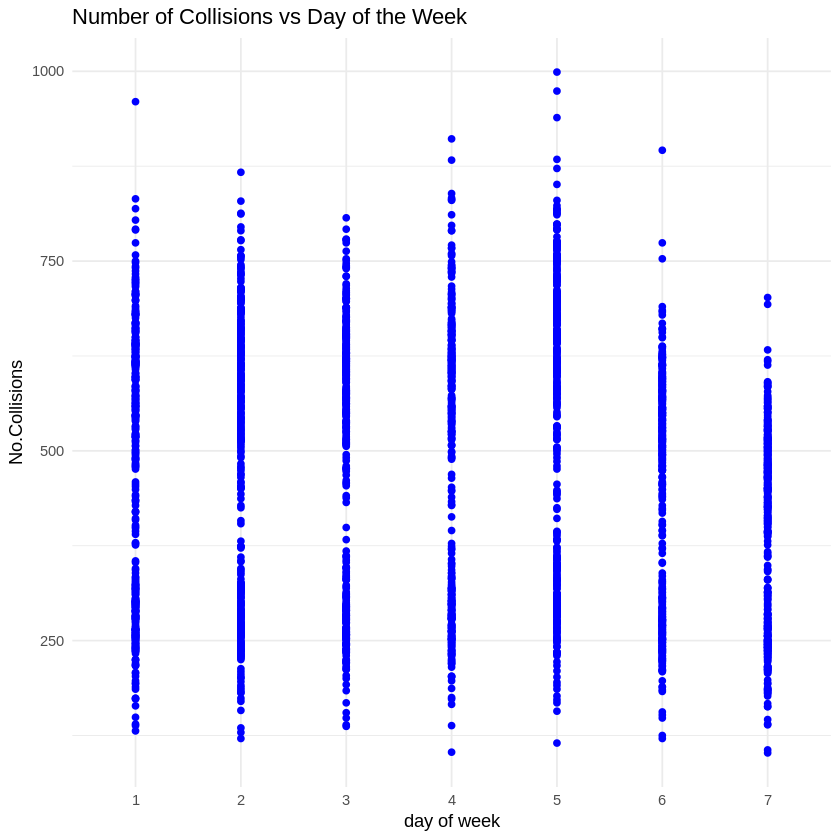

In [38]:
#plot of collisions and days of the week
ggplot(combined_clean, aes(x = day, y = NUM_COLLISIONS)) +
  geom_point(colour = "blue")+
  labs(title = "Number of Collisions vs Day of the Week",
x = "day of week", y = "No.Collisions")+
  scale_x_discrete(limits = as.character(1:7))+
  theme_minimal()



In [39]:
mean_per_day <- combined_clean %>%
group_by(day) %>%
summarise(mean_collisions = mean(NUM_COLLISIONS))

knitr::kable(mean_per_day)



| day| mean_collisions|
|---:|---------------:|
|   1|        474.0379|
|   2|        478.3271|
|   3|        483.0131|
|   4|        485.1263|
|   5|        529.2389|
|   6|        443.6377|
|   7|        392.7603|

This is further highlighted by reviewing the mean number of collisions on each day. This confirms the highest number of collisions occur on a friday, and the lowest on a Sunday. Similar collisions are recorded Mondays and Tuesdays, and Wednesdays and Thursdays and then lower on Saturdays.

In [40]:
combined_clean$day <- as.numeric(combined_clean$day)

#compute correlation coefficient
cor(combined_clean$day, combined_clean$NUM_COLLISIONS)

[1] -0.1075272

Computing a correlation coefficient for day of the week suggests a very weak negative linear correlation between day of the week and the number of collisions with a coefficient of -0.11. However, if the week is reordered Saturday - Friday, we see a slight positive correlation, confirmed by a calculated correlation coefficient of 0.19.

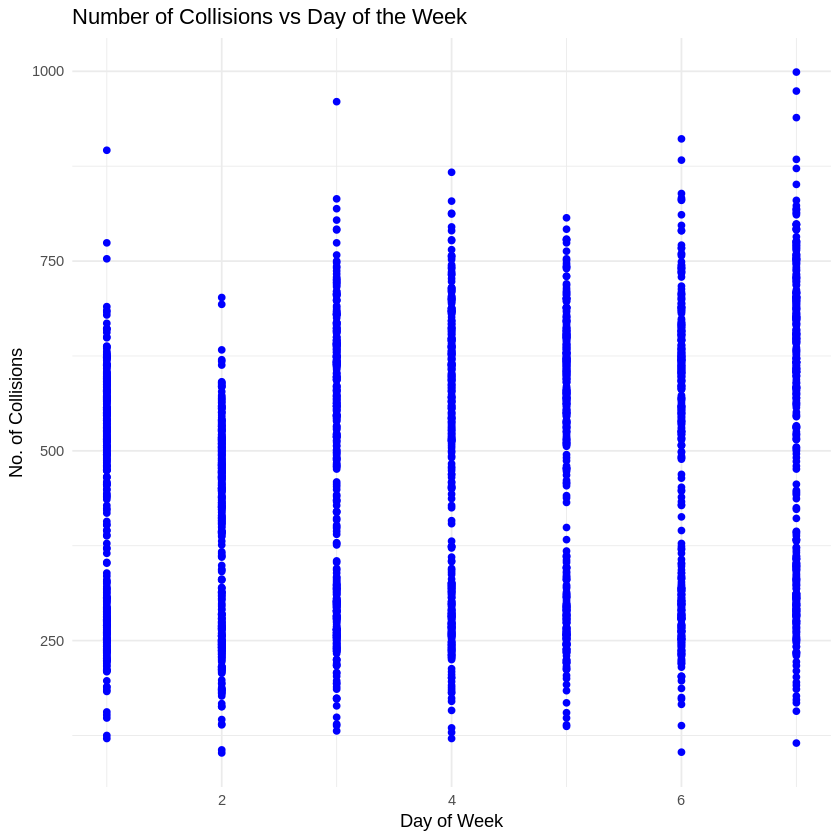

In [41]:
#reorder days starting at saturday - friday
combined_clean$day <- factor(combined_clean$day, levels = c(6, 7, 1, 2, 3, 4, 5))
combined_clean$day <- as.numeric(combined_clean$day)
# Plot with ggplot2
ggplot(combined_clean, aes(x = day, y = NUM_COLLISIONS)) +
  geom_point(color = "blue") +
  labs(title = "Number of Collisions vs Day of the Week",
       x = "Day of Week",
       y = "No. of Collisions") +
  theme_minimal()

#### Date
Reviewing the collisions over time, it is evident there is a significant drop in collisions from 2020 onwards. This would coincide with the COVID-19 pandemic (cdc.gov, 2023) where less vehicles were on the road due to people being required to remain home. Additionally, it is possible that the number of vehicles on the road remained lower as people became more active, walking between locations, and less reliant on their vehicles.

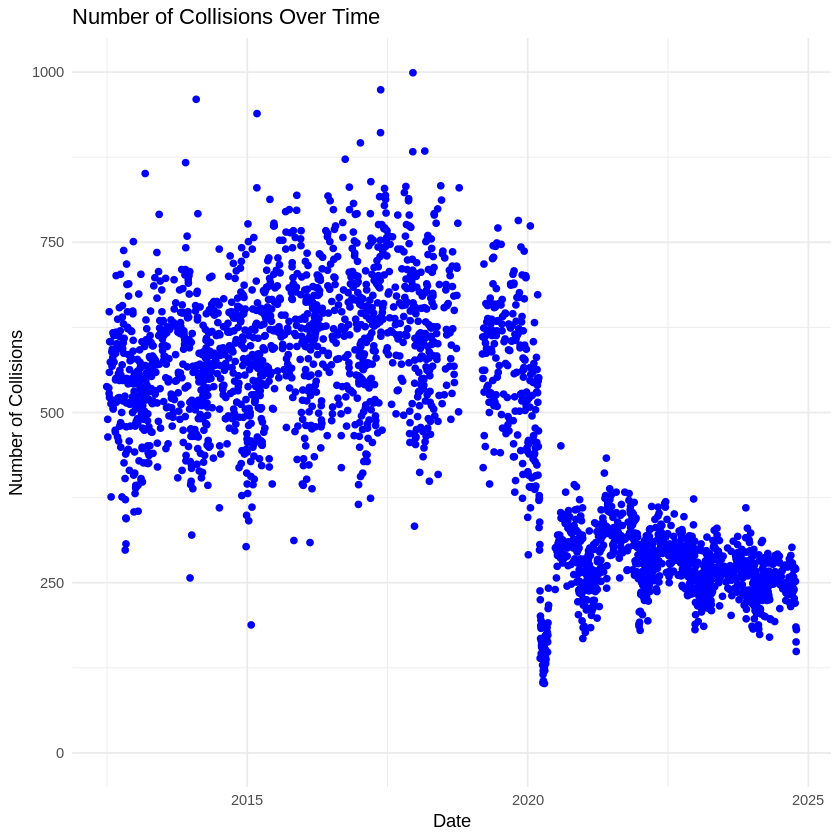

In [42]:
ggplot(combined_clean, aes(x = collision_date, y = NUM_COLLISIONS)) +
  geom_point(color = "blue") +
  labs(title = "Number of Collisions Over Time", x = "Date", y = "Number of Collisions") +
  ylim(0, 1000) +
  theme_minimal()

This drop in collisions since 2020 is apparent from the average annual plot. The drop from 2020 onwards also provides an explanation for the two clusters of data present across all plots for the weather variables above.
Further, across the time period, it appears a cycle pattern is taking place.
Reviewing the average number of collisions by year, below, shows a cyclic pattern between 2012 and 2019. This is less evident from 2020-2024 with an overall decrease in accidents visible from 2020 to 2024.

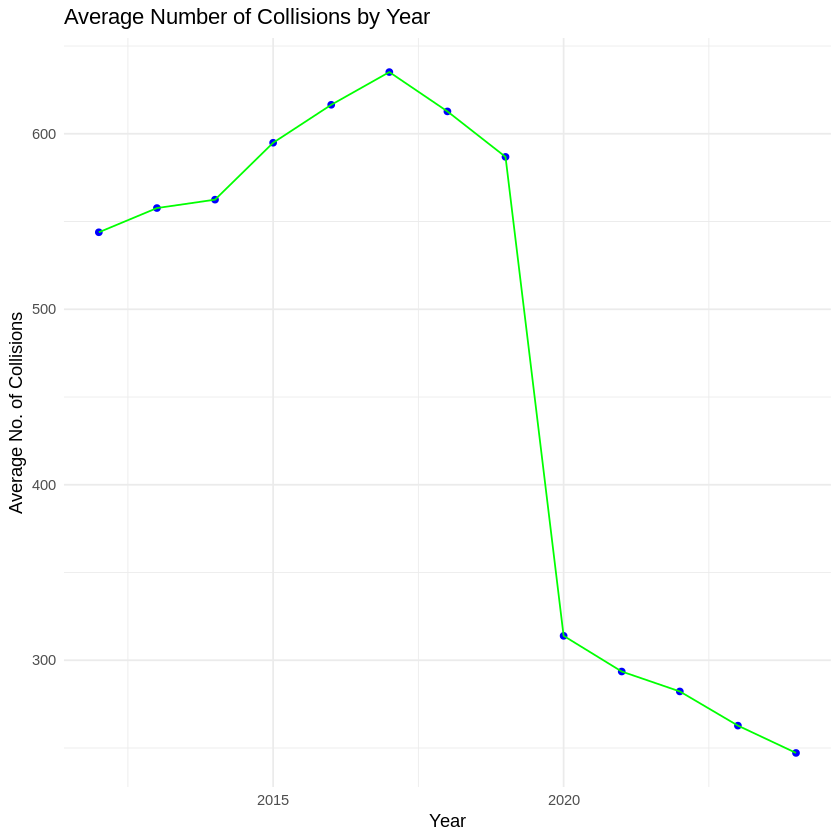

In [43]:
yearly_summary <- combined_clean %>%
  group_by(year) %>%
  summarise(mean_collisions = mean(NUM_COLLISIONS, na.rm = TRUE))

ggplot(yearly_summary, aes(x = year, y = mean_collisions)) +
  geom_point(colour = "blue") +
  geom_line(color = "green") +
  labs(title = "Average Number of Collisions by Year",
       x = "Year",
       y = "Average No. of Collisions") +
  theme_minimal()

In [44]:
#correlation coefficient 2012-2024
cor(combined_clean$year, combined_clean$NUM_COLLISIONS)

[1] -0.7170705

In [47]:
#create dataset for 2012-2019
combined_early <- combined_clean %>%
  filter(year >=2012,
         year < 2020)

#create dataset for 2020-2024
combined_late <- combined_clean %>%
  filter(year >=2020)

In [48]:
#correlation coefficient 2012-2024
cor(combined_early$year, combined_early$NUM_COLLISIONS)
cor(combined_late$year, combined_late$NUM_COLLISIONS)

[1] 0.2176773

[1] -0.325426

Computing the correlation coefficient across the entire year range concludes a negative correlation of -0.62. However, this is not an accurate depiction of the relationship due to the obvious step in data in 2020. Splitting the data into two, 2012-2019 and 2020-2024 and recomputing the correlation coefficient for each group concludes a slight positive correlation for 2012 to 2019 with a value of 0.22, whilst between 2020 and 2024 a slight negative correlation is calculated with a coefficient of -0.33. This shows the difference in the relationships pre and post 2020.

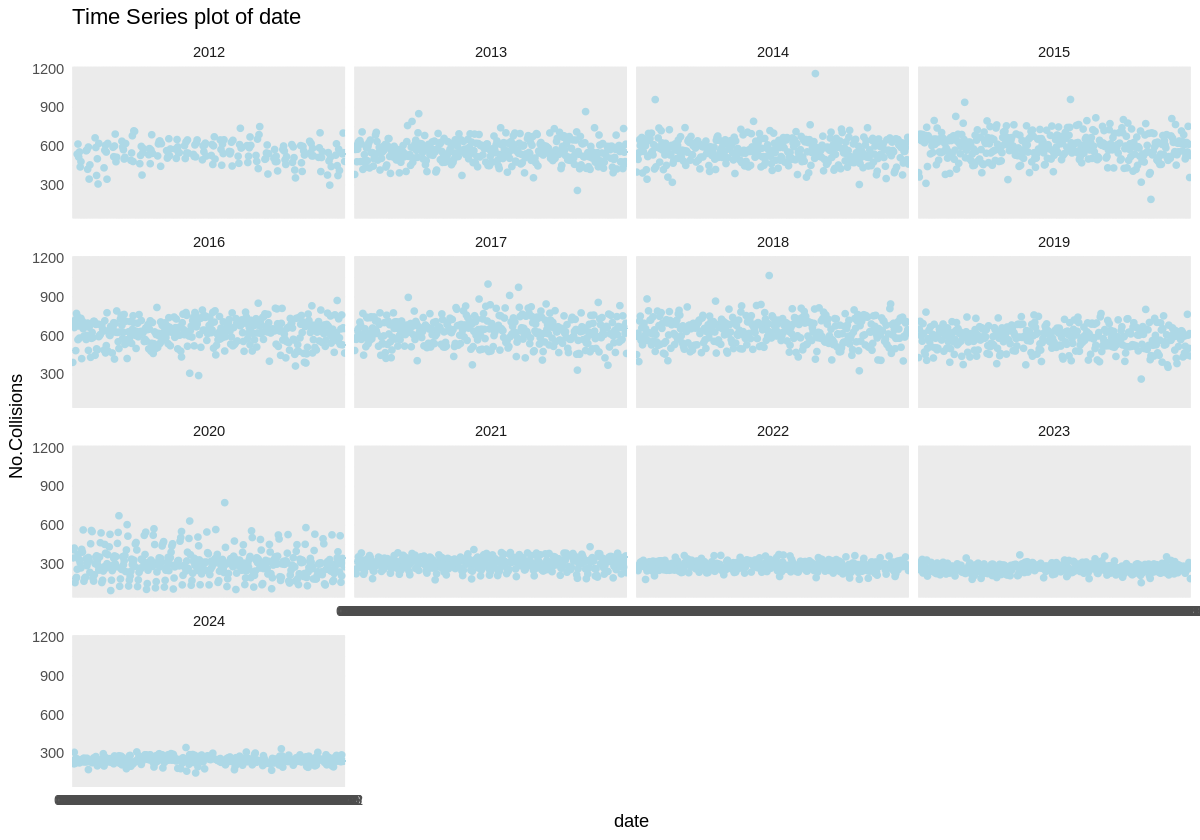

In [49]:
#plot dimensions
options(repr.plot.width = 10, rep.plot.height = 5)

#date plot
ggplot(combined, aes(x = day_month , y = NUM_COLLISIONS)) +
  geom_point(colour = "light blue")+
  labs(title = "Time Series plot of date",
x = "date", y = "No.Collisions")+
  theme_minimal()+
  facet_wrap(~year)

This is further highlighted by plotting each individual year.  It is clear that 2012-2020 has more spread in data compared to 2021-2024. Plots have been produced below, separating the data into early (2012-2019) and late period (2020-2024).

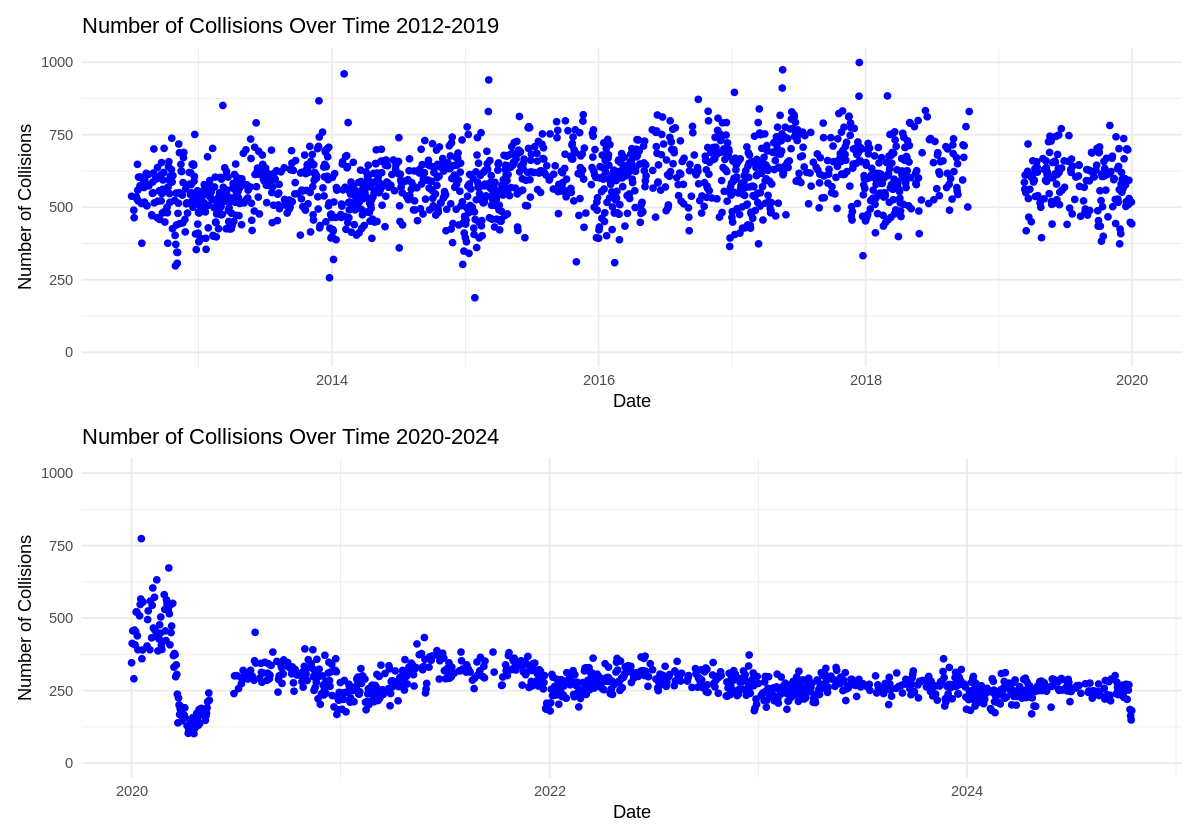

In [50]:
#collisions plot for early
p5 <- ggplot(combined_early, aes(x = collision_date, y = NUM_COLLISIONS)) +
  geom_point(color = "blue") +
  labs(title = "Number of Collisions Over Time 2012-2019", x = "Date", y = "Number of Collisions") +
  ylim(0, 1000) +
  theme_minimal()

#collisions plot for late
p6 <- ggplot(combined_late, aes(x = collision_date, y = NUM_COLLISIONS)) +
  geom_point(color = "blue") +
  labs(title = "Number of Collisions Over Time 2020-2024", x = "Date", y = "Number of Collisions") +
  ylim(0, 1000) +
  theme_minimal()

p5/p6

In [51]:
#combined early statistics
early_stat <- data.frame(
  Mean = mean(combined_early$NUM_COLLISIONS),
  SD = sd(combined_early$NUM_COLLISIONS)
)
#combined late statistics
late_stat <- data.frame(
  Mean = mean(combined_late$NUM_COLLISIONS),
  SD = sd(combined_late$NUM_COLLISIONS)
)
stats_table <-
 rbind(
   cbind(dataset = "Early", early_stat),
   cbind(dataset = "Late", late_stat)
 )

knitr::kable(stats_table)



|dataset |     Mean|       SD|
|:-------|--------:|--------:|
|Early   | 590.4263| 100.8106|
|Late    | 281.2154|  69.8365|

These plots highlight variation in the early to late period. The spread of data in the early period is much greater. This is confirmed with a SD of 100.8 compared to 69.8 for the late period. Additionally, the mean is significantly higher for the early period with a value of 590.4 compared to 281.2, thus affirming the greater number of collisions that occured pre 2020.
The previously mentioned cyclic pattern is also visible. Each year, the number of collisions sits lower at the start and end of the year compared to the middle. This is possibly due to busier roads in with people taking more holidays to explore and travel.
For the later period, the cyclic pattern is less evident but still present. For 2020, a greater cyclic pattern is observed; this is due the large drop in collisions in the first half of the year.


Warning message:
“Removed 24 rows containing missing values or values outside the scale range
(`geom_point()`).”


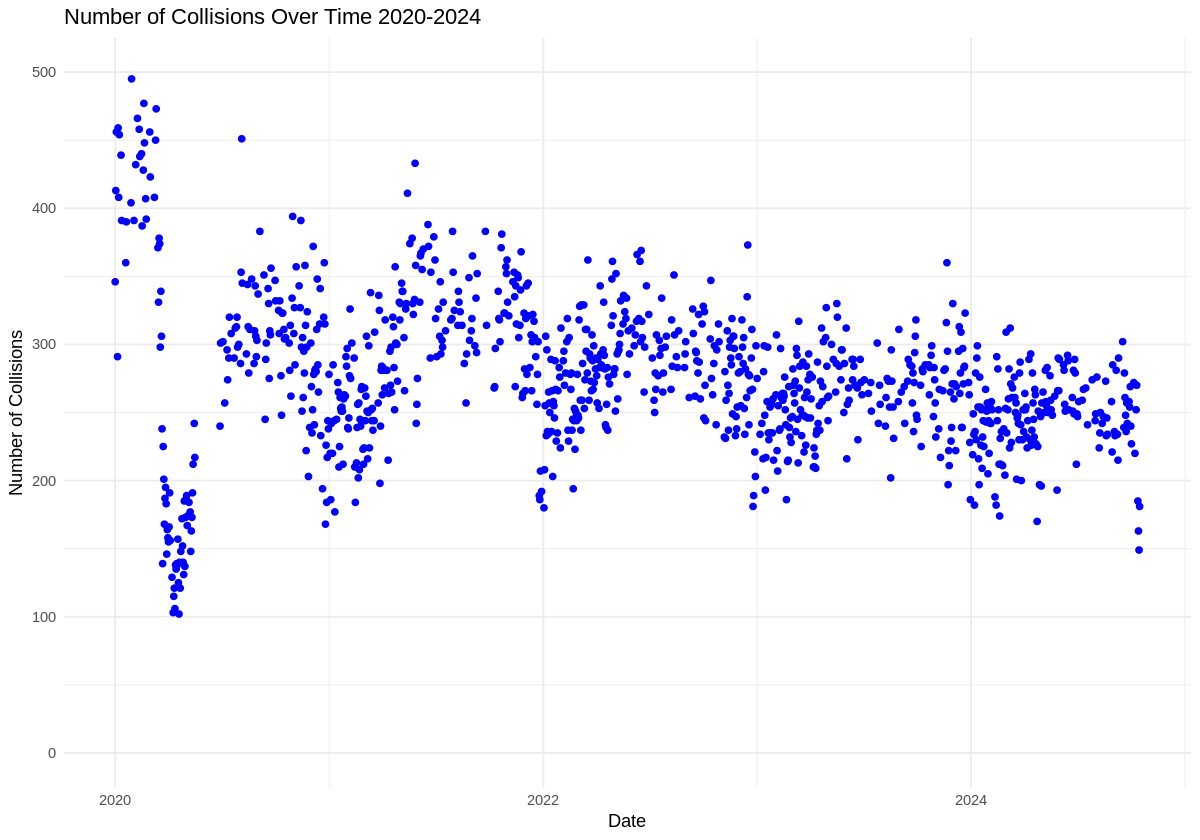

In [52]:
ggplot(combined_late, aes(x = collision_date, y = NUM_COLLISIONS)) +
  geom_point(color = "blue") +
  labs(title = "Number of Collisions Over Time 2020-2024", x = "Date", y = "Number of Collisions") +
  ylim(0, 500) +
  theme_minimal()

Altering the scale allows for the cyclic pattern to be more visible, however it also shows the pattern is less pronounced year on year with 2023-2024 showing much steadier data across the year.

For further analysis, a year in the early group and late group have both been extracted, 2015 and 2021. A comparison of the collisions in these years will take place below.

In [53]:
#2015 data
combined_2015 <- combined %>%
  filter(year == 2015)

#2022 data
combined_2022 <- combined %>%
  filter(year == 2022)

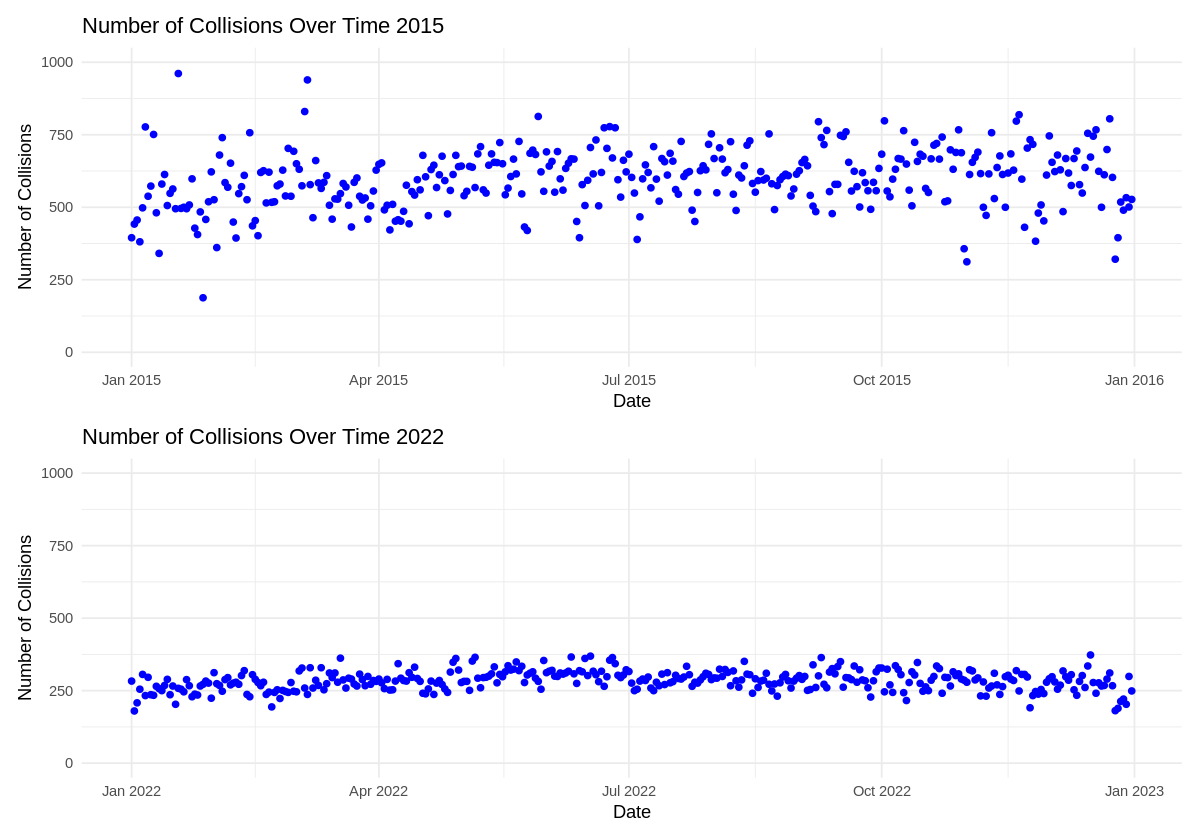

In [54]:
#collisions plot for 2015
p7 <- ggplot(combined_2015, aes(x = collision_date, y = NUM_COLLISIONS)) +
  geom_point(color = "blue") +
  labs(title = "Number of Collisions Over Time 2015", x = "Date", y = "Number of Collisions") +
  ylim(0, 1000) +
  theme_minimal()

#collisions plot for 2022
p8 <- ggplot(combined_2022, aes(x = collision_date, y = NUM_COLLISIONS)) +
  geom_point(color = "blue") +
  labs(title = "Number of Collisions Over Time 2022", x = "Date", y = "Number of Collisions") +
  ylim(0, 1000) +
  theme_minimal()

p7/p8

In [55]:
# Calculate Mean and Standard Deviation for 2015 and 2022
data_2015 <- data.frame(
  Mean = mean(combined_2015$NUM_COLLISIONS),
  SD = sd(combined_2015$NUM_COLLISIONS)
)

data_2022 <- data.frame(
  Mean = mean(combined_2022$NUM_COLLISIONS),
  SD = sd(combined_2022$NUM_COLLISIONS)
)

# Combine the results into one table
year_table <- rbind(
  cbind(Year = "2015", data_2015),
  cbind(Year = "2022", data_2022)
)

# Display the table using knitr::kable
knitr::kable(year_table)




|Year |     Mean|        SD|
|:----|--------:|---------:|
|2015 | 596.4219| 102.80159|
|2022 | 284.6192|  34.21932|

The annual plots for 2015 and 2022 further highlight the difference in spread, in the early period (2012-2019) compared to late period (2020-2024). The average number of collisions are significantly less in 2022 compared to 2014.

#### Month

In [56]:
combined_early$mo <- as.factor(combined_early$mo)
combined_late$mo <- as.factor(combined_late$mo)

In [57]:
p9 <- ggplot(combined_early, aes(x = da, y = NUM_COLLISIONS, col = mo)) +
  geom_point() +
  geom_line() +
  labs(title = "Number of Collisions Over Time", x = "Date", y = "Number of Collisions") +
  ylim(0, 1000) +
  theme_minimal()+
  facet_wrap(vars(year))
p10 <- ggplot(combined_late, aes(x = da, y = NUM_COLLISIONS, col = mo)) +
  geom_point() +
  geom_line() +
  labs(title = "Number of Collisions Over Time", x = "Date", y = "Number of Collisions") +
  ylim(0, 1000) +
  theme_minimal()+
  facet_wrap(vars(year))


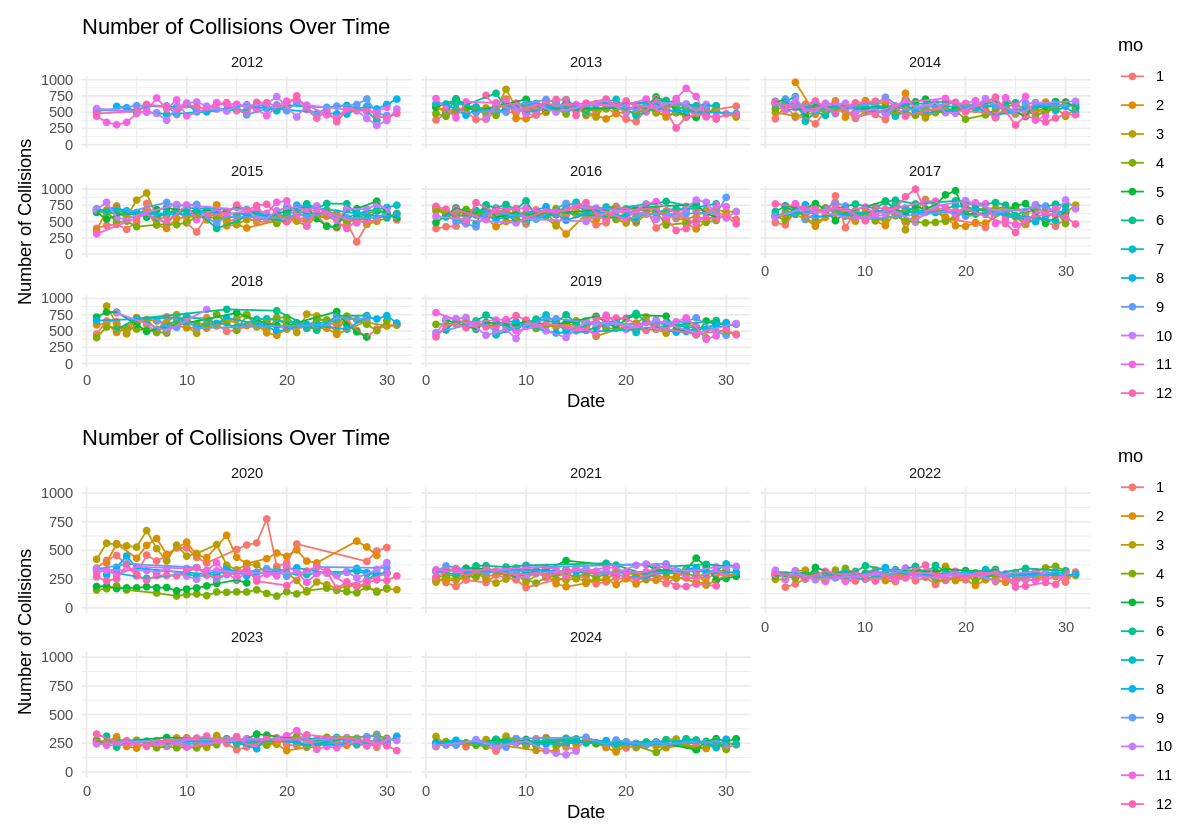

In [58]:
p9 / p10

Analysing the data by day of the month, the number of collisions is relatively consistent with little seasonal effects. Displaying a single year from the early and late period, below, confirms consistent variation across the year. This is more evident for 2022 than 2015, with more change present across the year.

In [59]:
combined_2015$mo <- as.factor(combined_2015$mo)
combined_2022$mo <- as.factor(combined_2022$mo)

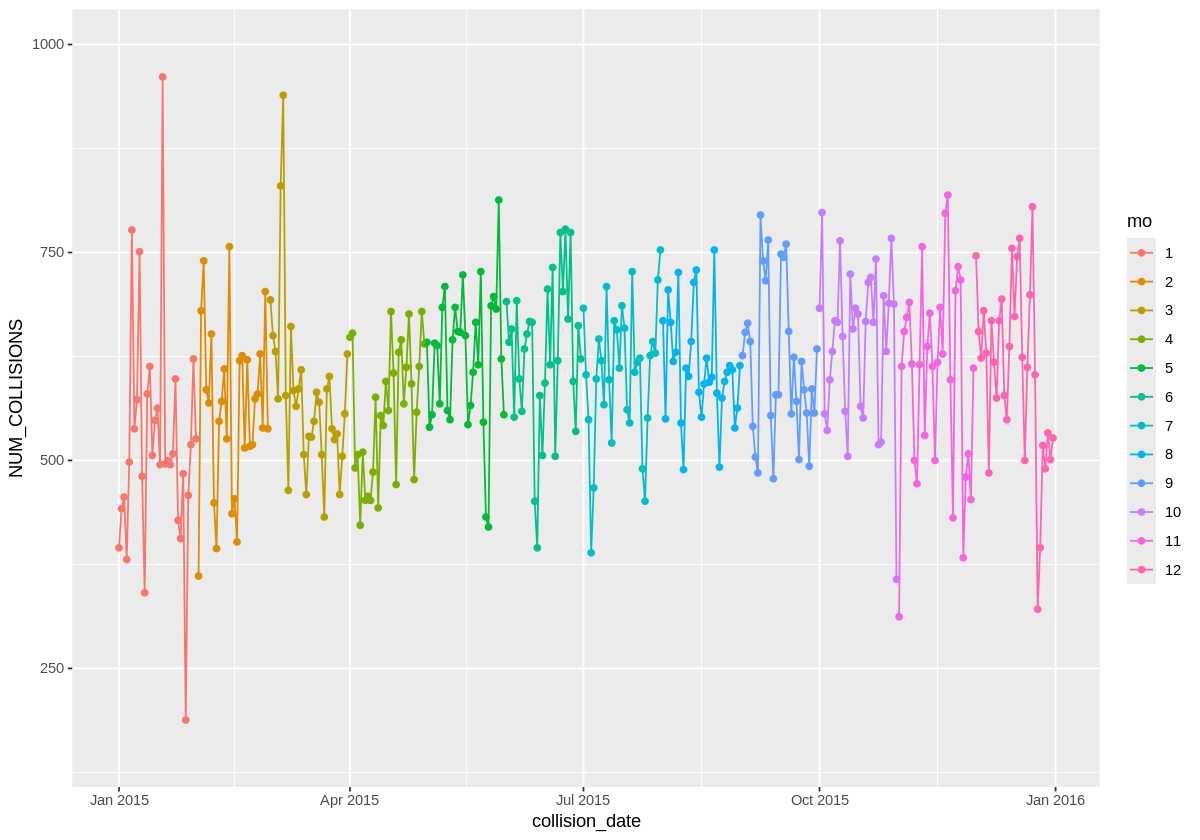

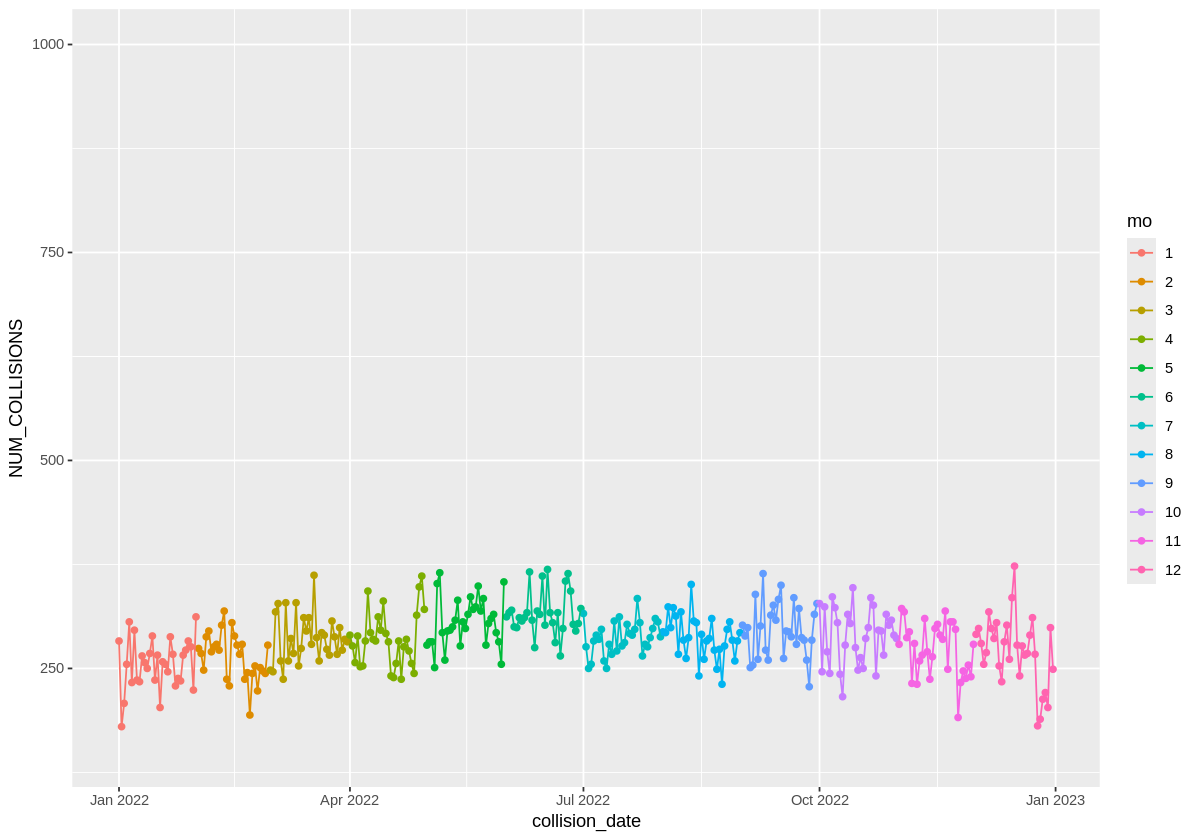

In [60]:
ggplot(combined_2015, aes(x = collision_date, y = NUM_COLLISIONS, colour = mo))+
  geom_point() +
  geom_line() +
  ylim(150,1000)
ggplot(combined_2022, aes(x = collision_date, y = NUM_COLLISIONS, colour = mo))+
  geom_point() +
  geom_line()+
  ylim(150,1000)

## Collision Data

For further analysis, additional factors that could contribute to collisions are review below. This includes Location, Vehicle Type and Contributing Factors.

### Location

In [61]:
head(location_data)

rounded_latitude rounded_longitude borough no_of_collisions
1 40.5033          -74.2375                  2               
2 40.5045          -74.2435                  4               
3 40.5069          -74.2530                  2               
4 40.5087          -74.2337                  2               
5 40.5100          -74.2494                  1               
6 40.5105          -74.2426                  2

In [62]:
#rename variables
location_data <- location_data %>%
  rename(longitude = rounded_longitude,
         latitude = rounded_latitude)

A summary of the Location data, indicates certain locations are outwith the boundary of NYC. A minimum longitude of -201.36 and a maximum of -32.77 are beyond the realms of NYC. Similarly, a minimum latitude of 30.78 is extreme given the mean of 40.72 and maximum of 43.34. After a review of co-ordinates using Google Maps (2024), the maximum and minimum latitude and longitude locations of NYC have been refined. Any longitude greater than -70 and less than -75, as well as any latitude less than 40 and greater than 41, have been removed due to an inaccurate location and being an outlier to NYC.

In [63]:
summary(location_data)

    latitude       longitude         borough          no_of_collisions  
 Min.   :30.78   Min.   :-201.36   Length:238361      Min.   :   1.000  
 1st Qu.:40.65   1st Qu.: -73.98   Class :character   1st Qu.:   1.000  
 Median :40.71   Median : -73.92   Mode  :character   Median :   2.000  
 Mean   :40.72   Mean   : -73.92                      Mean   :   7.918  
 3rd Qu.:40.77   3rd Qu.: -73.86                      3rd Qu.:   5.000  
 Max.   :43.34   Max.   : -32.77                      Max.   :1192.000  

In [64]:
location_clean <- location_data %>%
  filter(longitude > -75,
         longitude < -70,
         latitude > 40,
         latitude < 41)

In [65]:
head(location_clean[order(-location_clean$longitude), ], 10)
head(location_clean[order(location_clean$longitude), ], 10)

head(location_clean[order(-location_clean$latitude), ], 10)
head(location_clean[order(location_clean$latitude), ], 10)

latitude longitude borough no_of_collisions
49153  40.7399  -73.6630           1              
28021  40.7390  -73.7006           1              
175099 40.7390  -73.7006  QUEENS  25              
175187 40.7391  -73.7006  QUEENS   2              
197235 40.7400  -73.7007  QUEENS   5              
223793 40.7402  -73.7007  QUEENS   1              
175188 40.7409  -73.7008  QUEENS  16              
192866 40.7404  -73.7008  QUEENS   1              
209058 40.7402  -73.7008  QUEENS   2              
215394 40.7406  -73.7008  QUEENS   1

latitude longitude borough       no_of_collisions
18571  40.5606  -74.7420                7               
237062 40.5077  -74.2550  STATEN ISLAND 1               
233598 40.5075  -74.2548  STATEN ISLAND 1               
237427 40.5070  -74.2545  STATEN ISLAND 1               
49607  40.5077  -74.2539                1               
238164 40.5077  -74.2539  STATEN ISLAND 1               
232957 40.5076  -74.2532  STATEN ISLAND 1               
3      40.5069  -74.2530                2               
234757 40.5069  -74.2530  STATEN ISLAND 2               
238163 40.5066  -74.2530  STATEN ISLAND 1

latitude longitude borough no_of_collisions
60021 40.9129  -73.9025  BRONX   14              
56325 40.9128  -73.9025  BRONX    3              
62644 40.9126  -73.9015  BRONX    1              
76454 40.9126  -73.9028  BRONX    1              
12357 40.9125  -73.9026           4              
56324 40.9125  -73.9026  BRONX   39              
68483 40.9123  -73.9020  BRONX    1              
56322 40.9122  -73.9015  BRONX    1              
56323 40.9122  -73.9017  BRONX    6              
60020 40.9122  -73.9008  BRONX    1

latitude longitude borough       no_of_collisions
234217 40.4989  -74.2444  STATEN ISLAND 3               
235728 40.4991  -74.2435  STATEN ISLAND 1               
237799 40.4993  -74.2426  STATEN ISLAND 1               
237049 40.4995  -74.2417  STATEN ISLAND 1               
227845 40.4997  -74.2408  STATEN ISLAND 1               
237050 40.4997  -74.2379  STATEN ISLAND 1               
238158 40.4997  -74.2389  STATEN ISLAND 1               
43345  40.4998  -74.2399                1               
230622 40.4998  -74.2399  STATEN ISLAND 2               
232260 40.5000  -74.2390  STATEN ISLAND 5

The data presented above confirms realistic latitude and longitude values for NYC, presenting the maximum and minimum latitude and longitude values. Through this data, it is evident that on occasions Borough is null. This therefore provides inaccuracies in the location data review.
The table below presents all Boroughs, further confirming the extent of missing values. Over 50000 values do not have a Borough associated with the location and collision, as such cannot accuractely analyse the data by Borough and will therefore not be included in the regression analysis.
To allow for a review of the data by Borough, a subset of the data will be taken to exclude the missing values.

In [ ]:
table(location_clean$borough)


                      BRONX      BROOKLYN     MANHATTAN        QUEENS 
        50920         30465         66130         27524         51594 
STATEN ISLAND 
        11711 

In [66]:
borough <- location_clean %>%
  filter(!is.na(borough))

To assess the distribution of collisions based on Borough the plot below has been coloured by Borough and shows areas of higher collisions with a more colour. It is evident that least collisions occur in Manhattan. Following this, Staten Island is least prominent colour of the remaining Boroughs, whilst Brooklyn, Queens and Bronx all show strong colour and therefore all have high collision numbers in specific locations. This is similar to the table above which confirms Manhattan has the lowest number of collisions.
Statent Island however has the highest number of collisions, but due to the larger area that these are over, the intensity in certain locations is less so than Brookyn, Bronx and Queens.

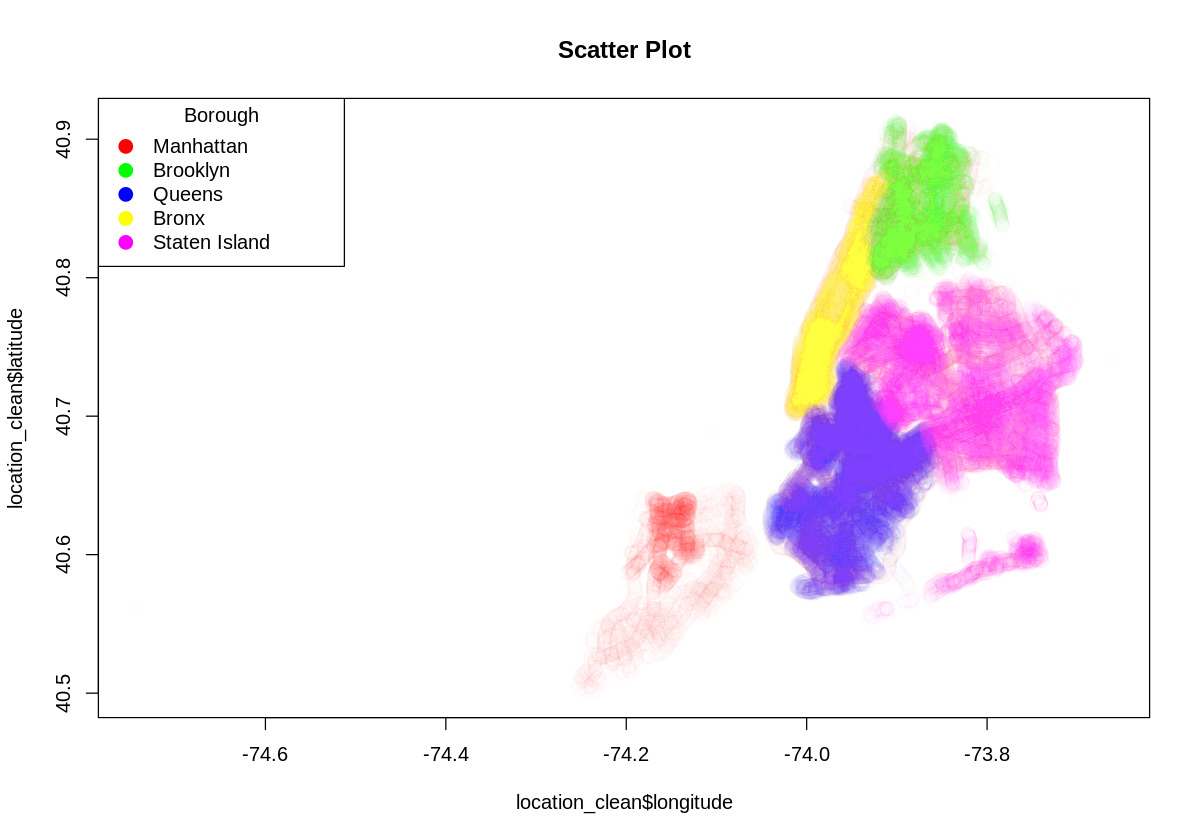

In [67]:
# Define a color palette for the boroughs
borough_colors <- c("Manhattan" = "#FF0000",
                    "Brooklyn" = "#00FF00",
                    "Queens" = "#0000FF",
                    "Bronx" = "#FFFF00",
                    "Staten Island" = "#FF00FF")

# Draw the scatter plot with defined colors
plot(location_clean$longitude,
     location_clean$latitude,
     main="Scatter Plot",
     col=adjustcolor(borough_colors[as.factor(location_clean$borough)], alpha.f = 0.008),
     pch=1,
     cex=1.5)


     legend("topleft",
       legend = names(borough_colors),
       col = borough_colors,
       pch = 19,
       pt.cex = 1.5,
       title = "Borough")


Analysing all data based on latitude and longitude, the plot below shows the density of the collisions. This shows areas of high collision occurrence, where the colour is darker. This is mainly contained to the central area of the longitude, however spread across the latitude. This aligns with the findings above by Borough highlighting Brooklyn, Queens and Bronx as the collision hotspots despite data being excluded from the Borough analysis.

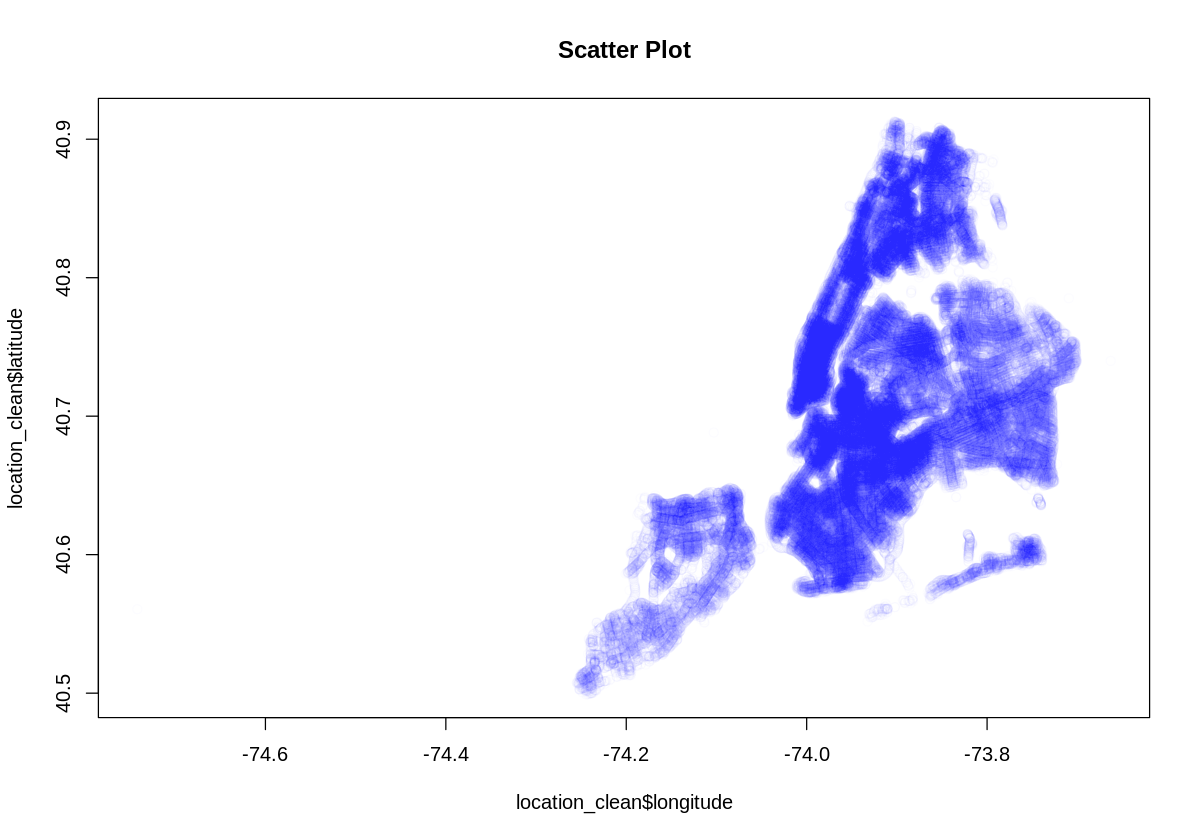

In [68]:
# draw a scatter plot of lat and lon that emphasises density using opacity
plot (location_clean$longitude, location_clean$latitude, main="Scatter Plot", col=adjustcolor("#0000FF", alpha.f = 0.01), pch=1)

Additional plots have been produced below, round the longitude and latitude to 3 and 2 decimal places for clarity, to show the hotspots for collisions. These are denoted most clearly in the second plot below in green.

In [69]:
location_clean$longitude <- round(location_clean$longitude, 3)
location_clean$latitude <- round(location_clean$latitude, 2)

In [70]:
agg_location <- location_clean %>%
  group_by(latitude, longitude) %>%
  summarise(collisions = sum(no_of_collisions))

`summarise()` has grouped output by 'latitude'. You can override using the
`.groups` argument.


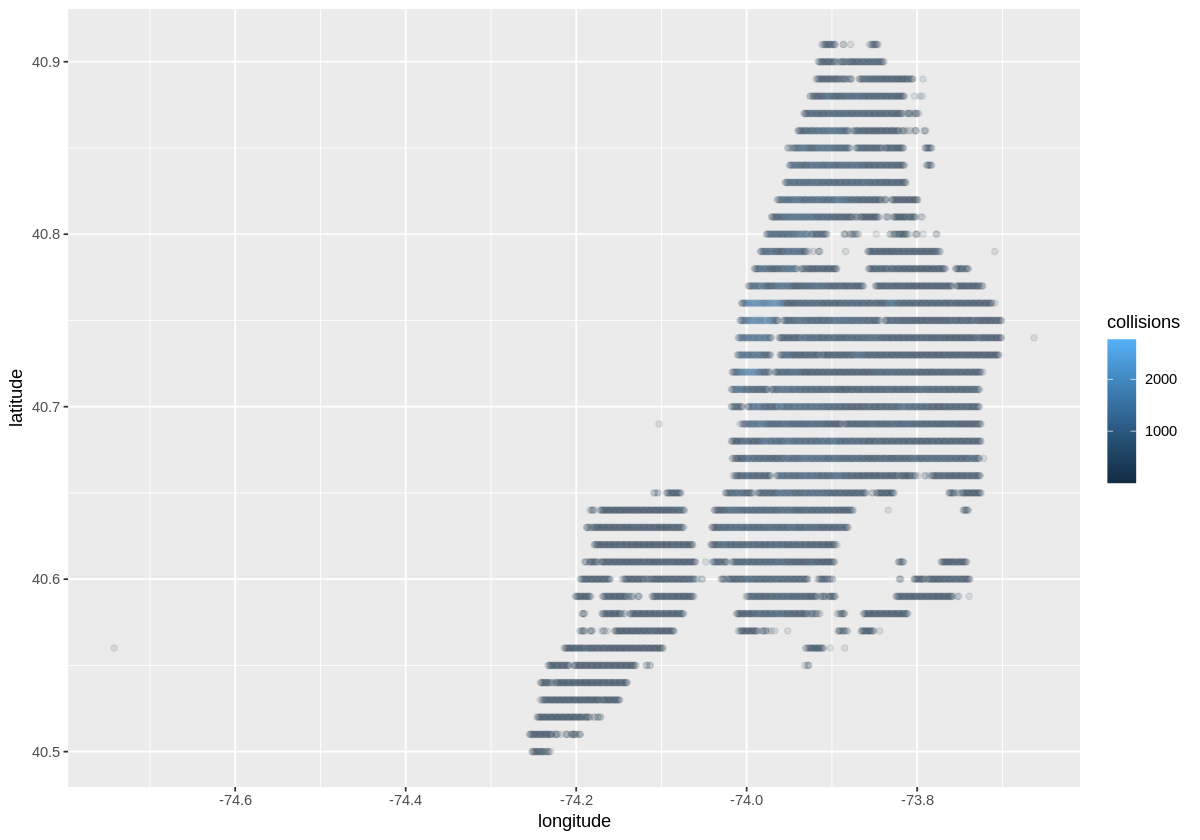

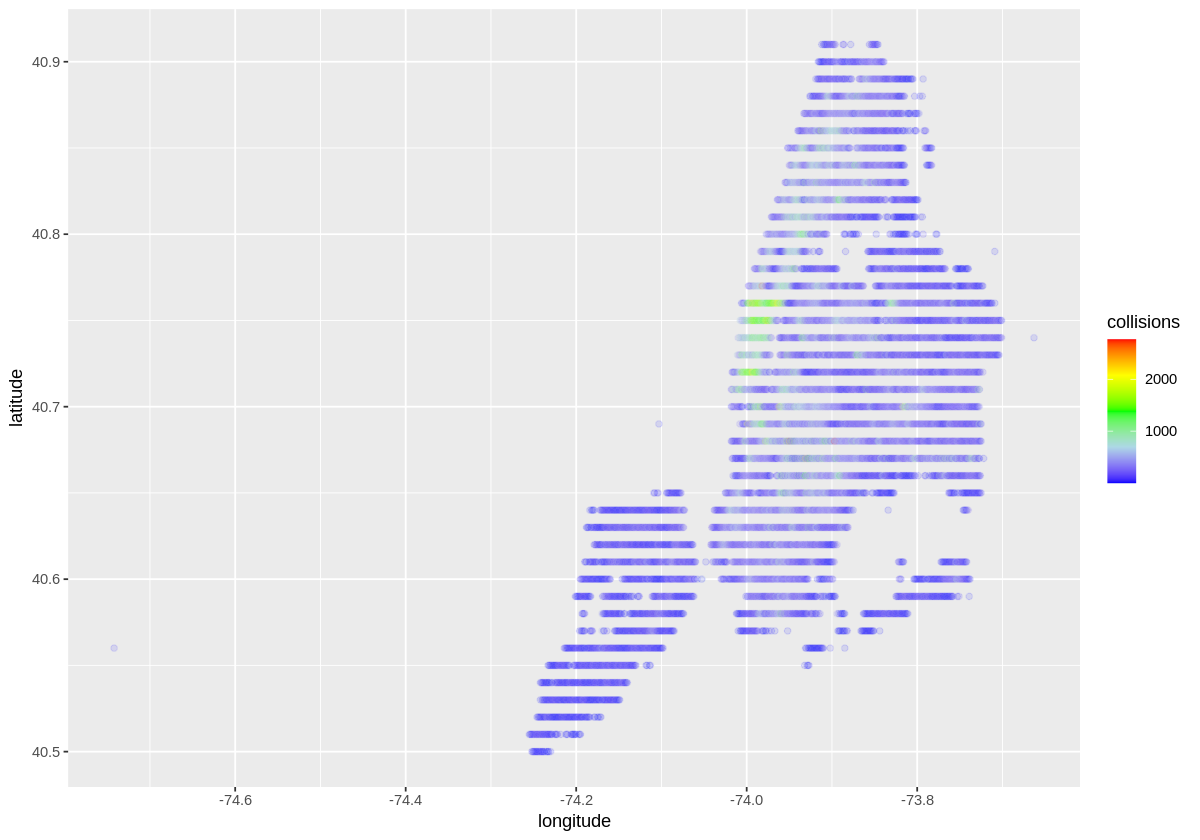

In [71]:
ggplot(data = agg_location, mapping = aes(x = longitude, y = latitude)) + geom_point(aes(color = collisions), shape = 19, alpha = 0.1)
last_plot() + scale_color_gradientn(colors=c("red", "yellow", "green", "lightblue", "blue"), values=c(1, 0.75, 0.5, 0.25, 0))

This presents the highest number of collisions occuring in the central longitude and latitude location.

### Vehicle Type

Investigating the types of vehicles involved in the accidents, the most commonly involved vehicle was a Sedan which was involved in over 128000 more accidents than the next vehicle. However, reviewing the categories it is evident that the input of vehicle data is manual entry and therefore the same vehicles has been given slightly different names, or written in capitals and has therefore resulted in a multiple categories for the same vehicle type. For example, the vehicle type 'Stations Wagon/Sport Utility Vehicle' and 'SPORT UTILITY/ STATION WAGON' are shown as two separate categories despite being the same. If these were shown as a single category, the number of collisions would exceed that of the Sedan in total, making the Station Wagon/ Sport Utility Vehicle the vehicle involved in the most collisions. Regardless of this, the top three vehicles (Station Wagon/ Sport Utility Vehicle, Sedan and Passenger Vehicle) are involved in significantly more collisions than any other vehicle making them a possible reason for collisions. However, it is also possible that these are the most common vehicles on the road and therefore there is a greater possibility of being in a collision.    

In [72]:
head(vehicle, 15)

vehicle_type_code1                  collision_count
1  Sedan                               600517         
2  Station Wagon/Sport Utility Vehicle 472068         
3  PASSENGER VEHICLE                   416206         
4  SPORT UTILITY / STATION WAGON       180291         
5  Taxi                                 53071         
6  4 dr sedan                           40180         
7  Pick-up Truck                        35975         
8  TAXI                                 31911         
9  VAN                                  25266         
10 Box Truck                            25160         
11 OTHER                                22968         
12 Bus                                  22513         
13 UNKNOWN                              19938         
14 Bike                                 16138         
15                                      14523

### Contributing Factors
Analysing the Contributing Factors of collisions, the highest number of collisions are attributed to 'Unspecified'. This disregards a high proportion of collisions to an unknown cause. The following highest contributing factors are 'Driver Inattention/ Distraction', 'Failure to Yeild Right of Way' and 'Following too closely', however the total of all three factors does not exceed the number of collisions where are due to an Unspecified reason. As such, it is difficult to rely on this data. Additionally, similar to Vehicle type, some factors include "illness" and "illnes" which are both the same factor are mispelt creating multiple categories for the same thing. Similarly, a factor of "80" or "1" does not provide any insight into what the factor is.

In [73]:
head(contributing_factor)

contributing_factor            no_collisions
1 Unspecified                    720524       
2 Driver Inattention/Distraction 428874       
3 Failure to Yield Right-of-Way  126938       
4 Following Too Closely          114360       
5 Backing Unsafely                78404       
6 Other Vehicular                 66163

#Conclusions

## Discussion

Following the collection, manipulation and analysis of data the impact of weather on collisions in NYC has been explored. After the removal/ conversion of missing values, the dataset allowed for analysis of all weather variables. This confirmed normally distributed data for several of the variables, including Temperature, Dew Point, Sea Level Pressure and Maximum and Minimum Wind Speed whislt Precipitation, Snow Deapth and the remianing Wind variables all showed skewed data; this all likely due to the frequency of occurence of more extreme weather events. Additionally, Fog presents as a binary variable (present or not) which will therefore be utilised within the future regression analysis.

Across all weather variables there were two distinct groups of data which could later be attributed to pre and post 2020 as the number of collisions significantly reduced which in the initial period is likely due the Covid-19 pandemic and less journeys been made due to isolation. Therefore, for the regression analysis, the data will be reviewed looking at the two separate time periods and as a whole to evaluate any differences.

The correlations of all weather variables was assessed, with the most significant correlation in the number of collisions corresponding with Temperature and Dew Point. The lowest correlation was concluded as Precipitation. This suggests Temperature and Dew Point have a more significant impact on the number of collisions than precipitation.

Further analysis carried out on the non binary weather variables showed consistent patterns, including the Temperature and Dew Point showing consistent trending, which is to be expected given the association between the two variables. Similarly, the results for Temperature, Maximum and Minimum are all on trending, which is further to be expected due to Tempeature incorporating the Maximum and Minimum within its value. The trending of the Temperature variables is replicated with the wind variables where all trend in a similar direction due to their associations.

When analysing the annual data for any season effects, it is evident that there is a rise in collisions in the summer with reduced numbers of collisions at the start and end of the year. Similarly, when assessing by day, a Sunday results in lower collisions overall than any other day suggesting an effect by day. As mentioned, there is a clear impact on the number of collisions as a result of the Covid-19 pandemic, however the seasonal impact is consistent across all years.  

The assessment of the location data concludes that there is an impact on the number of collisions dependent on the location, however this needed to be assessed by latitude and longitude as opposed to Borough due to the large number of data points that have no Borough associated with it. As such, the location data to be used for regression analysis will be latitude and longitude.

Analysing the vehicle types involved in collisions indicates that there is a correlation between vehicle type and the number of collisions, however this is likely driven by the most common vehicle types driven. Vehicle and Contributing Factors are both manual input and therefore have discrepencies in the data including typographical errors which result in multiple versions of the same variable leading to inaccuracies in the analysis. Due to these inaccuracies, these variables will be excluded from the regression analysis.

In [79]:
#remove borough from locatiaon data
location_clean <- location_clean %>%
  select(latitude, longitude, no_of_collisions)

In [81]:
#save out all required files for Assignment 2
write.csv(combined_clean, "/content/assignment2_combinedclean.csv")
write.csv(combined_early, "/content/assignment2_combinedearly.csv")
write.csv(combined_late, "/content/assignment2_combinedlate.csv")
write.csv(location_clean, "/content/assignment2_location.csv")

## Conclusion

In conclusion, required transformations have been made to the data to allow for regression analysis within Assignment 2. This will allow for full conclusions to be drawn on the impact of weather on the number of collisions in NYC on an individual day. Initial analysis has confirmed the greatest correlations with Temperature and Dew Point with the number of collisions that occur, whilst Precipitation is the less correlated weather variable. However, in addition to these weather variables, it is evident that there are other factors such as day of the week, month, location, vehicle type and contributing factor that all have an impact on the number of collisions that occur.

Consequently, it can be concluded that although there is clear impact on the number of collisions with certain weather variables, other factors also play a significant part in the number of collisions. As such, all datasets that have been manipulated have been saved ahead of Regression analysis to be conducted within Assignment 2. This will provide conclusive answers regarding the specific impacts, looking at both pre and post pandemic, separately and combined, as well as the weather events alongside the additional factors.

updated collated data file,
locations with lat/long to smaller decimal places


#References

cdc.gov (2023). CDC Museum Covid-19 Timelines. Available at: https://www.cdc.gov/museum/timeline/covid19.html. Accessed 10/11/2024

Google Cloud (2024) BigQuery. https://console.cloud.google.com/bigquery. Accessed 24/11/2024

R Core Team (2023). R: A Language and Environment for Statistical Computing. Vienna, Austria. Available at: https://www.R-project.org/.

# Apppendices

## Appendix 1: BigQuery Queries





#### Weather Data
CREATE VIEW `uhi-project-435609.assignment_data.weather_2012_to_2024`

AS SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog

FROM `bigquery-public-data.noaa_gsod.gsod2012` WHERE wban='94728'

union all

SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog

FROM `bigquery-public-data.noaa_gsod.gsod2013` WHERE wban='94728'

union all

SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog

FROM `bigquery-public-data.noaa_gsod.gsod2014` WHERE wban='94728'

union all

SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog

FROM `bigquery-public-data.noaa_gsod.gsod2015` WHERE wban='94728'

union all

SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog

FROM `bigquery-public-data.noaa_gsod.gsod2016` WHERE wban='94728'

union all

SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog

FROM `bigquery-public-data.noaa_gsod.gsod2017` WHERE wban='94728'

union all

SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog

FROM `bigquery-public-data.noaa_gsod.gsod2018` WHERE wban='94728'

union all

SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog

FROM `bigquery-public-data.noaa_gsod.gsod2019` WHERE wban='94728'

union all

SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog

FROM `bigquery-public-data.noaa_gsod.gsod2020` WHERE wban='94728'

union all

SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date,
year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog

FROM `bigquery-public-data.noaa_gsod.gsod2021` WHERE wban='94728'

union all

SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog

FROM `bigquery-public-data.noaa_gsod.gsod2022` WHERE wban='94728'

union all

SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog

FROM `bigquery-public-data.noaa_gsod.gsod2023` WHERE wban='94728'

union all

SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog

FROM `bigquery-public-data.noaa_gsod.gsod2024` WHERE wban='94728'

ORDER BY year, mo, da;

#### Collision Data
CREATE VIEW `uhi-project-435609.assignment_data.collision_data_count`

AS SELECT CAST(timestamp as DATE) as collision_date, COUNT(CAST(timestamp as DATE)) as NUM_COLLISIONS

FROM `bigquery-public-data.new_york_mc_collisions.nypd_mv_collisions`

GROUP BY collision_date;

#### Collated Data
CREATE TABLE `uhi-project-435609.assignment_data.collated_collision_data`

AS SELECT day, year, mo, da, collision_date, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, NUM_COLLISIONS
FROM `uhi-project-435609.assignment_data.weather_2012_to_2024` as weather, `uhi-project-435609.assignment_data.collision_data_count_final` as complaints WHERE complaints.collision_date = weather.date;


#### Location Dataset
SELECT
    latitude,
    longitude,
    borough,
    COUNT(*) AS no_of_collisions  
FROM
    `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions`
WHERE
    latitude IS NOT NULL AND longitude IS NOT NULL  
GROUP BY
    latitude, longitude, borough                            
ORDER BY
    no_of_collisions DESC

#### Contributing Factors Dataset
SELECT contributing_factor_vehicle_1 AS contributing_factor, COUNT(*) AS no_collisions

FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions`

GROUP BY contributing_factor_vehicle_1

ORDER BY no_collisions



#### Vehicles Dataset
SELECT vehcile_type_code_1 AS vehicle_type, COUNT(*) AS no_collisions

FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions`

GROUP BY vehcile_type_code_1

ORDER BY no_collisions